1. Web Scraping
Here, for navigating in the website by clicking buttons at necessary times selenium is used.
For navigating through html structure and extract text from the page BeautifulSoup is used.
The language chosen for EDA is 'Marathi'

In [9]:
!pip install selenium

     ---------------------------------------- 9.5/9.5 MB 5.6 MB/s eta 0:00:00
     -------------------------------------- 467.7/467.7 kB 5.9 MB/s eta 0:00:00
     ---------------------------------------- 60.8/60.8 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 58.3/58.3 kB ? eta 0:00:00
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successfully uninstalled typing_extensions-4.4.0
  Attempting uninstall: sniffio
    Found existing installation: sniffio 1.2.0
    Uninstalling sniffio-1.2.0:
      Successfully uninstalled sniffio-1.2.0
  Attempting uninstall: attrs
    Found existing installation: attrs 22.1.0
    Uninstalling attrs-22.1.0:
      Successfully uninstalled attrs-22.1.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.51.0rc1 requires crcmod<2.0,>=1.7, which is not installed.
apache-beam 2.51.0rc1 requires fastavro<2,>=0.23.6, which is not installed.
apache-beam 2.51.0rc1 requires fasteners<1.0,>=0.3, which is not installed.
apache-beam 2.51.0rc1 requires hdfs<3.0.0,>=2.1.0, which is not installed.
apache-beam 2.51.0rc1 requires js2py<1,>=0.74, which is not installed.
apache-beam 2.51.0rc1 requires objsize<0.7.0,>=0.6.1, which is not installed.
apache-beam 2.51.0rc1 requires orjson<4,>=3.9.7, which is not installed.
apache-beam 2.51.0rc1 requires proto-plus<2,>=1.7.1, which is not installed.
apache-beam 2.51.0rc1 requires pydot<2,>=1.2.0, which is not installed.
apache-beam 2.51.0rc1 requires pymongo<5.0.0,>=3.8.0, which is not installed.
apache-beam 2.51.0rc1 requires cloudpickle~=2.2.1, but you have cloudpickle 

In [8]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from urllib.parse import urljoin
import os
import time
import re

In [9]:
# Testing the function to extract textual data from given page url
# Will be used later in the code 

def extract_text_from_url(url):
    # Send a request to the webpage
    response = requests.get(url)

    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the main wrapper div
    main_wrapper = soup.find('div', class_='main-wrapper')

    # Find all span tags with class 'align-left' inside the main wrapper
    spans = main_wrapper.find_all('span', class_='align-left')

    # Extract and concatenate the text inside these span tags
    concatenated_text = ' '.join(span.get_text(strip=True) for span in spans)
    cleaned_text = re.sub(r'\d+', '', concatenated_text) # Removing unnecessary numeric values from the text
    
    return cleaned_text

# Example usage
webpage_url = "https://live.bible.is/bible/VAHDPI/LUK/1?audio_type=audio"
concatenated_text = extract_text_from_url(webpage_url)
print(concatenated_text)

आदरणीय थियूफिलूस, बऱ्याचं लोकायन आमच्यात झालेल्या घटनेच्या बाऱ्यात एक वृतान्त लिवण्यासाठी प्रयत्न केला हाय. त्यायनं ठिक तसचं लिवलं, जसं त्या व्दारे आमाले सांगतले गेले होते. त्यायनं येशूले त्याच्या सेवेच्या सुरवाती पासून पायले होते. अन् जे नंतर देवाच्या वचनाचे सेवक बनले, त्यायनं ह्या गोष्टी आमच्या परेंत पोहचवल्या. हे आदरणीय थियूफिलूस मी पण या सगळ्या गोष्टीला ध्यानपूर्वक तपासून पायल्या, अन् मले हे चांगलं वाटलं कि मी या घटनेला तुमच्यासाठी क्रमानुसार लिवतो. मी हे यासाठी लिवतो कावून कि तुमाले त्या गोष्टीची खरी-खरी माईती मालूम व्हावी. जवा हेरोद राजा यहुदीया प्रांताच्या राजा होता, याच्या दिवसात अबिया नावाच्या याजकाच्या वर्गात जखऱ्या नावाचा एक याजक होता, अन् त्याची बायको हारोनाचा वंशातली होती, जिचं नाव अलीशिबा होतं. अन् ते दोघही देवाच्या समोर धर्मी होते, कावून कि ते देवाच्या सगळ्या आज्ञा अन् विद्या प्रमाण वागत होते, अन् निर्दोष जीवन जगत होते. पण त्यायले लेकरू नव्हत, कावून कि अलीशिबा वांजोटी होती, अन् ते दोघही बुढे होते. एका दिवशी जवा जखऱ्याचा याजक समूह यरुशलेमच्या देवळात देवाच्या समोर सेवा करत

In [10]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import os

# Initialize the WebDriver and open the website
driver = webdriver.Chrome()
driver.get("https://live.bible.is/bible/MARDPI/GEN/3")

# Define the base folder path where everything will be downloaded
base_folder_path = "C:/Users/TANAY/anaconda3/envs/SIT/SarvamAIWebScraping"

try:
    # Wait until the button is clickable
    button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.CLASS_NAME, "book-chapter"))
    )
    button.click()
    print("Button clicked successfully.")
    
    # Waiting for the content to load
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, "testament-title"))
    )
    
    # Get the page source for parsing
    page_source = driver.page_source
    # Parse the page source with BeautifulSoup
    soup = BeautifulSoup(page_source, 'html.parser')
    
    # Find the target div with class 'testament-title' containing "New Testament"
    target_div = soup.find('div', class_='testament-title', string=lambda text: text and "New Testament" in text)

    base_url = "https://live.bible.is/"

    # Start with the next sibling of the target <div>
    nxt_div = target_div.find_next_sibling()

    while nxt_div and nxt_div.name == 'div' and 'book-button' in nxt_div.get('class', []):
        # Create a folder named after the id of the nxt_div within the base folder path
        folder_name = nxt_div.get('id')
        if folder_name:
            folder_path = os.path.join(base_folder_path, folder_name)
            os.makedirs(folder_path, exist_ok=True)

        # Extract the href attributes of <a> tags within this <div>
        link_index = 1
        for a_tag in nxt_div.find_all('a', class_='chapter-box'):
            full_url = urljoin(base_url, a_tag['href'])  # Convert to absolute URL
            text_content = extract_text_from_url(full_url)  # Extract text using the predefined function

            # Save the text content to a file named in numerical order within the folder
            file_path = os.path.join(folder_path, f"{link_index}.txt")
            with open(file_path, 'w', encoding='utf-8') as file:
                file.write(text_content)

            link_index += 1

        # Move to the next sibling
        nxt_div = nxt_div.find_next_sibling()
        
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    # Close the driver
    driver.quit()


Button clicked successfully.
An error occurred: Message: 
Stacktrace:
	GetHandleVerifier [0x00007FF6D2591522+60802]
	(No symbol) [0x00007FF6D250AC22]
	(No symbol) [0x00007FF6D23C7CE4]
	(No symbol) [0x00007FF6D2416D4D]
	(No symbol) [0x00007FF6D2416E1C]
	(No symbol) [0x00007FF6D245CE37]
	(No symbol) [0x00007FF6D243ABBF]
	(No symbol) [0x00007FF6D245A224]
	(No symbol) [0x00007FF6D243A923]
	(No symbol) [0x00007FF6D2408FEC]
	(No symbol) [0x00007FF6D2409C21]
	GetHandleVerifier [0x00007FF6D28941BD+3217949]
	GetHandleVerifier [0x00007FF6D28D6157+3488183]
	GetHandleVerifier [0x00007FF6D28CF0DF+3459391]
	GetHandleVerifier [0x00007FF6D264B8E6+823622]
	(No symbol) [0x00007FF6D2515FBF]
	(No symbol) [0x00007FF6D2510EE4]
	(No symbol) [0x00007FF6D2511072]
	(No symbol) [0x00007FF6D25018C4]
	BaseThreadInitThunk [0x00007FFE04E8257D+29]
	RtlUserThreadStart [0x00007FFE06F0AA48+40]



In [ ]:
def extract_text_from_url(url):
    # Send a request to the webpage
    response = requests.get(url)

    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the main wrapper div
    main_wrapper = soup.find('div', class_='main-wrapper')

    # Find all span tags with class 'align-left' inside the main wrapper
    spans = main_wrapper.find_all('span', class_='align-left')

    # Extract and concatenate the text inside these span tags
    concatenated_text = ' '.join(span.get_text(strip=True) for span in spans)

    return concatenated_text

def capture_network_logs(driver):
    # Enable network tracking
    driver.execute_cdp_cmd('Network.enable', {})

    # Collect network logs
    network_logs = []

    def log_response(response):
        try:
            response_body = json.loads(response['message'])['message']
            network_logs.append(response_body)
        except Exception as e:
            print(f"Error parsing response: {e}")

    return network_logs, log_response


def get_audio_url(url):
    driver.get(url)
    
    # Initialize play button
    play_button = driver.find_element(By.ID, 'play-audio')

    # Capture network logs
    network_logs = capture_network_logs(driver)

    # Click the play button
    play_button.click()
    print("Play button clicked.")

    # Allow time for the audio to play and requests to be captured
    time.sleep(2)

    # Retrieve and process network logs
    logs = driver.get_log('performance')
    for entry in logs:
        log_response(entry)
        
    driver.quit()
    cloudfront_urls = set(
            log['params']['request']['url'] for log in network_logs
            if log.get('method') == 'Network.requestWillBeSent'
            and log['params']['request']['method'] == 'GET'
            and log['params']['type'] == 'Media'
            and 'cloudfront.net' in log['params']['request']['url']
        )
        
    return cloudfront_urls

In [40]:
# Configure Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.set_capability('goog:loggingPrefs', {'performance': 'ALL'})  # Set logging preferences
chrome_service = ChromeService(executable_path='C:/Program Files (x86)/chromedriver.exe')

driver = webdriver.Chrome(service=chrome_service, options=chrome_options)

driver.get("https://live.bible.is/bible/MARDPI/GEN/3")

# Define the base folder path where everything will be downloaded
base_folder_path = "Bible_Texts"

try:
    # Wait until the button is clickable
    button = WebDriverWait(driver, 30).until(
        EC.element_to_be_clickable((By.CLASS_NAME, "book-chapter"))
    )
    button.click()
    print("Button clicked successfully.")
    
    # Waiting for the content to load
    WebDriverWait(driver, 30).until(
        EC.presence_of_element_located((By.CLASS_NAME, "testament-title"))
    )
    
    # Get the page source for parsing
    time.sleep(3)  # Additional wait to ensure the page is fully loaded
    page_source = driver.page_source
    
    # Parse the page source with BeautifulSoup
    soup = BeautifulSoup(page_source, 'html.parser')
    
    # Find the target div with class 'testament-title' containing "New Testament"
    target_div = soup.find('div', class_='testament-title', string=lambda text: text and "New Testament" in text)
    
    base_url = "https://live.bible.is/"

    # Start with the next sibling of the target <div>
    nxt_div = target_div.find_next_sibling()

    while nxt_div and nxt_div.name == 'div' and 'book-button' in nxt_div.get('class', []):
        try:
            # Create a folder named after the id of the nxt_div within the base folder path
            folder_name = nxt_div.get('id')
            if folder_name:
                folder_path = os.path.join(base_folder_path, folder_name)
                os.makedirs(folder_path, exist_ok=True)
                print(f"Created folder: {folder_path}")
            
            WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, 'play-audio')))
            # Extract the href attributes of <a> tags within this <div>
            link_index = 1
            for a_tag in nxt_div.find_all('a', class_='chapter-box'):
                full_url = urljoin(base_url, a_tag['href'])  # Convert to absolute URL
                print(f"Processing URL: {full_url}")
                
                path_chapters = os.path.join(folder_path, str(link_index))
                os.makedirs(path_chapters, exist_ok=True)
                print(f"Created folder: {path_chapters}")
                
                retry_count = 2
                while retry_count > 0:
                    try:
                        text_content = extract_text_from_url(full_url)  # Extract text using the predefined function
                        audio_url = get_audio_url(full_url)
                        
                        # Save the text content to a file named in numerical order within the folder
                        file_path = os.path.join(path_chapters, f"{link_index}.txt")
                        with open(file_path, 'w', encoding='utf-8') as file:
                            file.write(text_content)
                        print(f"Saved content to: {file_path}")
                        
                        # Download the content from the captured URLs
                        for i, url in enumerate(audio_url):
                            response = requests.get(url)
                            file_path = os.path.join(path_chapters, f"content_{i}.mp3")
                            with open(file_path, 'wb') as file:
                                file.write(response.content)
                            print(f"Downloaded content from {url} to {file_path}")

                        
                        break  # Exit the retry loop if successful
                    except Exception as e:
                        retry_count -= 1
                        if retry_count > 0:
                            # Re-click the play button if retry is needed
                            play_button = WebDriverWait(driver, 10).until(
                                EC.element_to_be_clickable((By.ID, 'play-audio'))
                            )
                            play_button.click()
                            print(f"Retrying ({2 - retry_count}/2) for URL: {full_url} due to error: {e}")
                            time.sleep(5)  # Wait briefly to allow the page to reload

                link_index += 1

            # Move to the next sibling
            nxt_div = nxt_div.find_next_sibling()
        except Exception as e:
            print(f"Error processing div {folder_name}: {e}")
            nxt_div = nxt_div.find_next_sibling()  # Ensure to move to the next sibling even if there is an error
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    # Close the driver
    driver.quit()


Button clicked successfully.
Created folder: Bible_Texts\मत्तयकृत शुभवर्तमानMAT
Processing URL: https://live.bible.is/bible/MARDPI/MAT/1
Created folder: Bible_Texts\मत्तयकृत शुभवर्तमानMAT\1
Play button clicked.
Error processing div मत्तयकृत शुभवर्तमानMAT: HTTPConnectionPool(host='localhost', port=57710): Max retries exceeded with url: /session/291a10206b5493c0410c52853cf8ae04/element (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000127658822C0>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))
Created folder: Bible_Texts\मार्ककृत शुभवर्तमानMRK
Error processing div मार्ककृत शुभवर्तमानMRK: HTTPConnectionPool(host='localhost', port=57710): Max retries exceeded with url: /session/291a10206b5493c0410c52853cf8ae04/element (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000012763AF7700>: Failed to establish a new connection: [WinError 10061] No c

KeyboardInterrupt: 

This is a block of code which extracts url to download of stored playable audio which is present on the page. 

It have been observed that many time after navigating to new page, the audio file takes too much time to load and leads to 'timeouterror'. 
To get the link and download the audio network activity have to be monitered after pressing 'play' button. For this whole process consume too much time and prone to many exceptions. 
So get textual data is scraped and audio files are downloaded and with a python script stored with their respective testament chapters.

In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import requests
import os
import json

def capture_network_logs(driver):
    logs = driver.get_log('performance')
    network_logs = []
    for entry in logs:
        log = json.loads(entry['message'])['message']
        if log['method'] == 'Network.requestWillBeSent':
            network_logs.append(log)
    return network_logs

def log_response(entry):
    log = json.loads(entry['message'])['message']
    return log

# Configure Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.set_capability('goog:loggingPrefs', {'performance': 'ALL'})  # Set logging preferences
chrome_service = ChromeService(executable_path='C:/Program Files (x86)/chromedriver.exe')

driver = webdriver.Chrome(service=chrome_service, options=chrome_options)

# Open the webpage
driver.get("https://live.bible.is/bible/MARDPI/MAT/1")

# Wait for the page to fully load and the play button to be clickable
play_button = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.ID, 'play-audio'))
)

# Capture network logs
network_logs = capture_network_logs(driver)

# Click the play button
play_button.click()
print("Play button clicked.")

# Allow time for the audio to play and requests to be captured
time.sleep(3)

# Retrieve and process network logs
logs = driver.get_log('performance')
for entry in logs:
    log_response(entry)

# Stop the audio playback
# Try to click a stop/pause button if exists, otherwise reload the page to stop the audio
try:
    stop_button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.ID, 'pause-audio'))  # Replace with the actual ID of the stop/pause button if available
    )
    stop_button.click()
    print("Stop button clicked.")
except:
    # If no stop/pause button is found, reload the page to stop the audio
    driver.refresh()
    print("Page refreshed to stop audio playback.")

# Close the WebDriver
driver.quit()

# Filter and return unique URLs containing "cloudfront.net"
cloudfront_urls = set(
    log['params']['request']['url'] for log in network_logs
    if log.get('method') == 'Network.requestWillBeSent'
    and log['params']['request']['method'] == 'GET'
    and log['params'].get('type') == 'Media'
    and 'cloudfront.net' in log['params']['request']['url']
)

# Create a folder to store the downloaded content
folder_path = "downloaded_content"
os.makedirs(folder_path, exist_ok=True)

# Download the content from the captured URLs
for i, url in enumerate(cloudfront_urls):
    response = requests.get(url)
    file_path = os.path.join(folder_path, f"content_{i}.mp3")
    with open(file_path, 'wb') as file:
        file.write(response.content)
    print(f"Downloaded content from {url} to {file_path}")


Play button clicked.
Stop button clicked.
Downloaded content from https://d1gd73roq7kqw6.cloudfront.net/audio/MARDPI/MARDPIN1DA/B01___01_Matthew_____MARDPIN1DA.mp3?x-amz-transaction=2299303&Expires=1716492216&Signature=KkeElzAB-EpZx3zIGwnhRmGoJasakYUk0Unmf~cMO0Dybah9fpkVPXjPEQ1tockdaljHMB~J39ee8lubtMw3UHG4T44fITNxK81EGTwWj-mJBbsWsqsKJv0WP23Othz1pP7MYXMniJCKjjxMG04jnHHpJhJjxmnomTqNQCPRydjIgGjuXjjWuVM1sSYBL70oHD7WnA5AsyC1X7lvTBWzaek7S-Uc9kPDUuOavVYnpd4mVj3qpO~lnT~4tZhWcoyd06aoW~VNGJ6K1MnOXkgN7IMo7-Ktmd83D2xYvTduhLwSgP873bjOt99foUNCLfs1kjWD~svoiK7VSaC3pSvN6w__&Key-Pair-Id=APKAI4ULLVMANLYYPTLQ to downloaded_content\content_0.mp3


# Code for downloading only the text file in the web page

In [10]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import os
import time

# Initialize the WebDriver and open the website
driver = webdriver.Chrome()
driver.get("https://live.bible.is/bible/MARDPI/GEN/3")

# Define the base folder path where everything will be downloaded
base_folder_path = "Bible_Texts"

try:
    # Wait until the button is clickable
    button = WebDriverWait(driver, 30).until(
        EC.element_to_be_clickable((By.CLASS_NAME, "book-chapter"))
    )
    button.click()
    print("Button clicked successfully.")
    
    # Waiting for the content to load
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, "testament-title"))
    )
    
    # Get the page source for parsing
    time.sleep(3)  # Additional wait to ensure the page is fully loaded
    page_source = driver.page_source
    
    # Parse the page source with BeautifulSoup
    soup = BeautifulSoup(page_source, 'html.parser')
    
    # Find the target div with class 'testament-title' containing "New Testament"
    target_div = soup.find('div', class_='testament-title', string=lambda text: text and "New Testament" in text)
    
    base_url = "https://live.bible.is/"

    # Start with the next sibling of the target <div>
    nxt_div = target_div.find_next_sibling()

    while nxt_div and nxt_div.name == 'div' and 'book-button' in nxt_div.get('class', []):
        try:
            # Create a folder named after the id of the nxt_div within the base folder path
            folder_name = nxt_div.get('id')
            if folder_name:
                folder_path = os.path.join(base_folder_path, folder_name)
                os.makedirs(folder_path, exist_ok=True)
                print(f"Created folder: {folder_path}")
            
            # Extract the href attributes of <a> tags within this <div>
            link_index = 1
            for a_tag in nxt_div.find_all('a', class_='chapter-box'):
                full_url = urljoin(base_url, a_tag['href'])  # Convert to absolute URL
                print(f"Processing URL: {full_url}")
                
                retry_count = 10
                while retry_count > 0:
                    try:
                        
                        text_content = extract_text_from_url(full_url)  # Extract text using the predefined function
                        
                        # Save the text content to a file named in numerical order within the folder
                        file_path = os.path.join(folder_path, f"{link_index}.txt")
                        with open(file_path, 'w', encoding='utf-8') as file:
                            file.write(text_content)
                        print(f"Saved content to: {file_path}")
                        
                        break  # Exit the retry loop if successful
                    except Exception as e:
                        retry_count -= 1
                        if retry_count > 0:
                            
                            WebDriverWait(driver, 10).until(
                                EC.element_to_be_clickable((By.ID, 'play-audio'))
                            )
                            time.sleep(5)
                            
                            print(f"Retrying ({2 - retry_count}/2) for URL: {full_url} due to error: {e}")
                            time.sleep(5)  # Wait briefly to allow the page to reload

                link_index += 1

            # Move to the next sibling
            nxt_div = nxt_div.find_next_sibling()
        except Exception as e:
            print(f"Error processing div {folder_name}: {e}")
            nxt_div = nxt_div.find_next_sibling()  # Ensure to move to the next sibling even if there is an error
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    # Close the driver
    driver.quit()

Button clicked successfully.
Created folder: Bible_Texts\मत्तयकृत शुभवर्तमानMAT
Processing URL: https://live.bible.is/bible/MARDPI/MAT/1
Saved content to: Bible_Texts\मत्तयकृत शुभवर्तमानMAT\1.txt
Processing URL: https://live.bible.is/bible/MARDPI/MAT/2
Saved content to: Bible_Texts\मत्तयकृत शुभवर्तमानMAT\2.txt
Processing URL: https://live.bible.is/bible/MARDPI/MAT/3
Saved content to: Bible_Texts\मत्तयकृत शुभवर्तमानMAT\3.txt
Processing URL: https://live.bible.is/bible/MARDPI/MAT/4
Saved content to: Bible_Texts\मत्तयकृत शुभवर्तमानMAT\4.txt
Processing URL: https://live.bible.is/bible/MARDPI/MAT/5
Saved content to: Bible_Texts\मत्तयकृत शुभवर्तमानMAT\5.txt
Processing URL: https://live.bible.is/bible/MARDPI/MAT/6
Saved content to: Bible_Texts\मत्तयकृत शुभवर्तमानMAT\6.txt
Processing URL: https://live.bible.is/bible/MARDPI/MAT/7
Saved content to: Bible_Texts\मत्तयकृत शुभवर्तमानMAT\7.txt
Processing URL: https://live.bible.is/bible/MARDPI/MAT/8
Retrying (-7/2) for URL: https://live.bible.is/bibl

Retrying (-7/2) for URL: https://live.bible.is/bible/MARDPI/LUK/19 due to error: 'NoneType' object has no attribute 'find_all'
Saved content to: Bible_Texts\लूककृत शुभवर्तमानLUK\19.txt
Processing URL: https://live.bible.is/bible/MARDPI/LUK/20
Retrying (-7/2) for URL: https://live.bible.is/bible/MARDPI/LUK/20 due to error: 'NoneType' object has no attribute 'find_all'
Saved content to: Bible_Texts\लूककृत शुभवर्तमानLUK\20.txt
Processing URL: https://live.bible.is/bible/MARDPI/LUK/21
Saved content to: Bible_Texts\लूककृत शुभवर्तमानLUK\21.txt
Processing URL: https://live.bible.is/bible/MARDPI/LUK/22
Saved content to: Bible_Texts\लूककृत शुभवर्तमानLUK\22.txt
Processing URL: https://live.bible.is/bible/MARDPI/LUK/23
Saved content to: Bible_Texts\लूककृत शुभवर्तमानLUK\23.txt
Processing URL: https://live.bible.is/bible/MARDPI/LUK/24
Saved content to: Bible_Texts\लूककृत शुभवर्तमानLUK\24.txt
Created folder: Bible_Texts\योहानकृत शुभवर्तमानJHN
Processing URL: https://live.bible.is/bible/MARDPI/JHN/1


Retrying (-7/2) for URL: https://live.bible.is/bible/MARDPI/ACT/20 due to error: 'NoneType' object has no attribute 'find_all'
Retrying (-6/2) for URL: https://live.bible.is/bible/MARDPI/ACT/20 due to error: 'NoneType' object has no attribute 'find_all'
Retrying (-5/2) for URL: https://live.bible.is/bible/MARDPI/ACT/20 due to error: 'NoneType' object has no attribute 'find_all'
Saved content to: Bible_Texts\प्रेषितांची कृत्येACT\20.txt
Processing URL: https://live.bible.is/bible/MARDPI/ACT/21
Retrying (-7/2) for URL: https://live.bible.is/bible/MARDPI/ACT/21 due to error: 'NoneType' object has no attribute 'find_all'
Saved content to: Bible_Texts\प्रेषितांची कृत्येACT\21.txt
Processing URL: https://live.bible.is/bible/MARDPI/ACT/22
Retrying (-7/2) for URL: https://live.bible.is/bible/MARDPI/ACT/22 due to error: 'NoneType' object has no attribute 'find_all'
Retrying (-6/2) for URL: https://live.bible.is/bible/MARDPI/ACT/22 due to error: 'NoneType' object has no attribute 'find_all'
Retr

Saved content to: Bible_Texts\करिंथकरांस दुसरे पत्र2CO\6.txt
Processing URL: https://live.bible.is/bible/MARDPI/2CO/7
Saved content to: Bible_Texts\करिंथकरांस दुसरे पत्र2CO\7.txt
Processing URL: https://live.bible.is/bible/MARDPI/2CO/8
Saved content to: Bible_Texts\करिंथकरांस दुसरे पत्र2CO\8.txt
Processing URL: https://live.bible.is/bible/MARDPI/2CO/9
Saved content to: Bible_Texts\करिंथकरांस दुसरे पत्र2CO\9.txt
Processing URL: https://live.bible.is/bible/MARDPI/2CO/10
Saved content to: Bible_Texts\करिंथकरांस दुसरे पत्र2CO\10.txt
Processing URL: https://live.bible.is/bible/MARDPI/2CO/11
Saved content to: Bible_Texts\करिंथकरांस दुसरे पत्र2CO\11.txt
Processing URL: https://live.bible.is/bible/MARDPI/2CO/12
Saved content to: Bible_Texts\करिंथकरांस दुसरे पत्र2CO\12.txt
Processing URL: https://live.bible.is/bible/MARDPI/2CO/13
Retrying (-7/2) for URL: https://live.bible.is/bible/MARDPI/2CO/13 due to error: 'NoneType' object has no attribute 'find_all'
Retrying (-6/2) for URL: https://live.bi

Saved content to: Bible_Texts\इब्री लोकांस पत्रHEB\8.txt
Processing URL: https://live.bible.is/bible/MARDPI/HEB/9
Saved content to: Bible_Texts\इब्री लोकांस पत्रHEB\9.txt
Processing URL: https://live.bible.is/bible/MARDPI/HEB/10
Saved content to: Bible_Texts\इब्री लोकांस पत्रHEB\10.txt
Processing URL: https://live.bible.is/bible/MARDPI/HEB/11
Saved content to: Bible_Texts\इब्री लोकांस पत्रHEB\11.txt
Processing URL: https://live.bible.is/bible/MARDPI/HEB/12
Retrying (-7/2) for URL: https://live.bible.is/bible/MARDPI/HEB/12 due to error: 'NoneType' object has no attribute 'find_all'
Retrying (-6/2) for URL: https://live.bible.is/bible/MARDPI/HEB/12 due to error: 'NoneType' object has no attribute 'find_all'
Saved content to: Bible_Texts\इब्री लोकांस पत्रHEB\12.txt
Processing URL: https://live.bible.is/bible/MARDPI/HEB/13
Retrying (-7/2) for URL: https://live.bible.is/bible/MARDPI/HEB/13 due to error: 'NoneType' object has no attribute 'find_all'
Retrying (-6/2) for URL: https://live.bibl

In [19]:
Folder_Aud = { मत्तयकृत शुभवर्तमानMAT: 'Matthew', मार्ककृत शुभवर्तमानMRK: 'Mark', लूककृत शुभवर्तमानLUK: 'Luke', 
              योहानकृत शुभवर्तमानJHN:'John', प्रेषितांची कृत्ये: 'Acts', रोमकरांस पत्रROM:'Romans',
              करिंथकरांस पहिले पत्र: '1CorinthiansMARDPIN1DA', करिंथकरांस दुसरे पत्र: '2CorinthiansMARDPIN1DA', गलतीकरांस पत्र: 'Galatians', 
              इफिसकरांस पत्र: 'Ephesians', फिलिप्पैकरांस पत्र: 'Philippians', कलस्सैकरांस पत्र: 'Colossians',
              थेस्सलनीकाकरांस पहिले पत्र: '1Thess', थेस्सलनीकाकरांस दुसरे पत्र: '2Thess', तीमथ्याला पहिले पत्र: '1Timothy', 
              तीमथ्याला दुसरे पत्र: '2Timonty', तीताला पत्र: 'Titus', फिलेमानाला पत्र: 'Philemon', इब्री लोकांस पत्र: 'Hebrews', 
              याकोबाचे पत्र: 'James',यहूदाचे पत्र:'Jude', योहानाचे पहिले पत्र: '1John', योहानाचे दुसरे पत्र: '2john', योहानाचे तिसरे पत्र: '3john', 
              प्रकटीकरण: 'Revelation' }

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2982615424.py, line 1)

In [16]:
import os
import re

# Define the path to the folder containing the audio files
audio_files_path = 'T:/MARDPIN1DA/Marathi_mar_DPI_NT_Non-Drama'

# Function to rename audio files to '1Corinthians 04' format
def rename_audio_files(path):
    for file_name in os.listdir(path):
        if file_name.endswith(('.mp3', '.wav')):  # Assuming audio files are in .mp3 or .wav format
            # Use regex to extract the numeric value and book name
            match = re.search(r'(\d+)_(\d+)_([A-Za-z]+)', file_name)
            if match:
                new_name = f"{match.group(3)} {match.group(2).zfill(2)}{os.path.splitext(file_name)[1]}"
                old_file_path = os.path.join(path, file_name)
                new_file_path = os.path.join(path, new_name)
                
                # Rename the file
                os.rename(old_file_path, new_file_path)
                print(f'Renamed "{file_name}" to "{new_name}"')

# Call the function
rename_audio_files(audio_files_path)


In [25]:
import os

# Define the path to your dataset
base_path = "C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts"

# Function to check if a file is an audio file
def is_audio_file(filename):
    audio_extensions = ['.mp3', '.wav', '.flac', '.aac', '.ogg']
    return any(filename.lower().endswith(ext) for ext in audio_extensions)

# Function to rename the file
def rename_file(file_path):
    dir_name, filename = os.path.split(file_path)
    if "__" in filename:
        new_name = filename.split("__", 1)[1]
        new_path = os.path.join(dir_name, new_name)
        os.rename(file_path, new_path)
        print(f'Renamed: {file_path} to {new_path}')
    else:
        print(f'Skipped (no __ found): {file_path}')

# Iterate through the folders and files
for root, dirs, files in os.walk(base_path):
    for file in files:
        file_path = os.path.join(root, file)
        if is_audio_file(file):
            rename_file(file_path)

Renamed: C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\इफिसकरांस पत्रEPH\B10___01_Ephesians___MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\इफिसकरांस पत्रEPH\_01_Ephesians___MARDPIN1DA.mp3
Renamed: C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\इफिसकरांस पत्रEPH\B10___02_Ephesians___MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\इफिसकरांस पत्रEPH\_02_Ephesians___MARDPIN1DA.mp3
Renamed: C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\इफिसकरांस पत्रEPH\B10___03_Ephesians___MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\इफिसकरांस पत्रEPH\_03_Ephesians___MARDPIN1DA.mp3
Renamed: C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\इफिसकरांस पत्रEPH\B10___04_Ephesians___MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\इफिसकरांस पत्रEPH\_04_Ephesians___MARDPIN1DA.mp3
Renamed: C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\इफिसकरांस पत्रEPH\B10___05_Ephesians___MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\इफिसकरांस पत्र

Renamed: C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\लूककृत शुभवर्तमानLUK\B03___01_Luke________MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\लूककृत शुभवर्तमानLUK\_01_Luke________MARDPIN1DA.mp3
Renamed: C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\लूककृत शुभवर्तमानLUK\B03___02_Luke________MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\लूककृत शुभवर्तमानLUK\_02_Luke________MARDPIN1DA.mp3
Renamed: C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\लूककृत शुभवर्तमानLUK\B03___03_Luke________MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\लूककृत शुभवर्तमानLUK\_03_Luke________MARDPIN1DA.mp3
Renamed: C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\लूककृत शुभवर्तमानLUK\B03___04_Luke________MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\लूककृत शुभवर्तमानLUK\_04_Luke________MARDPIN1DA.mp3
Renamed: C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\लूककृत शुभवर्तमानLUK\B03___05_Luke________MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT

In [24]:
import os
import shutil

# Define paths
audio_files_path = "T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama"
main_folders_path = "C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts"

# Dictionary mapping
book_dict = {
    'मत्तयकृत शुभवर्तमानMAT': 'Matthew', 'मार्ककृत शुभवर्तमानMRK': 'Mark', 'लूककृत शुभवर्तमानLUK': 'Luke', 
    'योहानकृत शुभवर्तमानJHN': 'John', 'प्रेषितांची कृत्ये': 'Acts', 'रोमकरांस पत्रROM': 'Romans',
    'करिंथकरांस पहिले पत्र': '1CorinthiansMARDPIN1DA', 'करिंथकरांस दुसरे पत्र': '2CorinthiansMARDPIN1DA', 'गलतीकरांस पत्र': 'Galatians', 
    'इफिसकरांस पत्र': 'Ephesians', 'फिलिप्पैकरांस पत्र': 'Philippians', 'कलस्सैकरांस पत्र': 'Colossians',
    'थेस्सलनीकाकरांस पहिले पत्र': '1Thess', 'थेस्सलनीकाकरांस दुसरे पत्र': '2Thess', 'तीमथ्याला पहिले पत्र': '1Timothy', 
    'तीमथ्याला दुसरे पत्र': '2Timonty', 'तीताला पत्र': 'Titus', 'फिलेमानाला पत्र': 'Philemon', 'इब्री लोकांस पत्र': 'Hebrews', 
    'याकोबाचे पत्र': 'James', 'यहूदाचे पत्र': 'Jude', 'योहानाचे पहिले पत्र': '1John', 'योहानाचे दुसरे पत्र': '2john', 'योहानाचे तिसरे पत्र': '3john', 
    'प्रकटीकरण': 'Revelation'
}

# Function to copy audio and corresponding text files to the appropriate folders
def copy_files(audio_path, main_folders_path, book_mapping):
    for audio_file in os.listdir(audio_path):
        if audio_file.endswith(('.mp3', '.wav')):  # Assuming audio files are in .mp3 or .wav format
            for marathi_name, english_name in book_mapping.items():
                if english_name in audio_file:
                    # Determine the destination folder
                    destination_folder = os.path.join(main_folders_path, marathi_name)
                    if not os.path.exists(destination_folder):
                        os.makedirs(destination_folder)
                    
                    # Copy the audio file to the destination folder
                    audio_file_path = os.path.join(audio_path, audio_file)
                    shutil.copy(audio_file_path, destination_folder)
                    print(f'Copied audio file "{audio_file}" to "{destination_folder}"')
                    
                    # Determine the corresponding text file
                    match = re.search(r'_(\d+)_', audio_file)
                    if match:
                        text_file_name = f'{match.group(1)}.txt'
                        text_file_path = os.path.join(main_folders_path, marathi_name, text_file_name)
                        if os.path.exists(text_file_path):
                            shutil.copy(text_file_path, destination_folder)
                            print(f'Copied text file "{text_file_name}" to "{destination_folder}"')
                    break

# Call the function
copy_files(audio_files_path, main_folders_path, book_dict)


Copied audio file "2John 01.mp3" to "C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\योहानकृत शुभवर्तमानJHN"
Copied audio file "2Thess 01.mp3" to "C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\थेस्सलनीकाकरांस दुसरे पत्र"
Copied audio file "2Thess 02.mp3" to "C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\थेस्सलनीकाकरांस दुसरे पत्र"
Copied audio file "2Thess 03.mp3" to "C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\थेस्सलनीकाकरांस दुसरे पत्र"
Copied audio file "3John 01.mp3" to "C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\योहानकृत शुभवर्तमानJHN"
Copied audio file "Acts 01.mp3" to "C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\प्रेषितांची कृत्ये"
Copied audio file "Acts 02.mp3" to "C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\प्रेषितांची कृत्ये"
Copied audio file "Acts 03.mp3" to "C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\प्रेषितांची कृत्ये"
Copied audio file "Acts 04.mp3" to "C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\प्रेषितांची कृत्ये"
Copied audio file "Acts 05.mp3" to "C:/Use

Copied audio file "Mark 07.mp3" to "C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\मार्ककृत शुभवर्तमानMRK"
Copied audio file "Mark 08.mp3" to "C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\मार्ककृत शुभवर्तमानMRK"
Copied audio file "Mark 09.mp3" to "C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\मार्ककृत शुभवर्तमानMRK"
Copied audio file "Matthew 01.mp3" to "C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\मत्तयकृत शुभवर्तमानMAT"
Copied audio file "Matthew 02.mp3" to "C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\मत्तयकृत शुभवर्तमानMAT"
Copied audio file "Matthew 03.mp3" to "C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\मत्तयकृत शुभवर्तमानMAT"
Copied audio file "Matthew 04.mp3" to "C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\मत्तयकृत शुभवर्तमानMAT"
Copied audio file "Matthew 05.mp3" to "C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\मत्तयकृत शुभवर्तमानMAT"
Copied audio file "Matthew 06.mp3" to "C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\मत्तयकृत शुभवर्तमानMAT"
Copied audio file "Matthew 0

In [27]:
import os
import shutil

# Define the path to your main folder containing subfolders with audio and text files
main_folder_path = "C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts"

# Function to organize files within a specific subfolder
def organize_files_in_folder(folder_path):
    # List all files in the folder
    files = os.listdir(folder_path)
    
    # Filter audio and text files
    audio_files = [f for f in files if f.startswith('_') and f.endswith(('.mp3', '.wav', '.flac', '.aac', '.ogg'))]
    text_files = [f for f in files if f.endswith('.txt')]

    # Create a dictionary to map text files to their corresponding audio files
    file_pairs = {}
    for text_file in text_files:
        file_number = os.path.splitext(text_file)[0]
        matching_audio_file = next((af for af in audio_files if af.startswith(f'_{int(file_number):02}')), None)
        if matching_audio_file:
            file_pairs[text_file] = matching_audio_file

    # Create subfolders and move files
    for text_file, audio_file in file_pairs.items():
        subfolder_name = f'Subfolder_{os.path.splitext(audio_file)[0]}'
        subfolder_path = os.path.join(folder_path, subfolder_name)
        os.makedirs(subfolder_path, exist_ok=True)
        
        # Move files to the subfolder
        shutil.move(os.path.join(folder_path, text_file), os.path.join(subfolder_path, text_file))
        shutil.move(os.path.join(folder_path, audio_file), os.path.join(subfolder_path, audio_file))
        print(f'Moved {text_file} and {audio_file} to {subfolder_path}')

# Iterate through all subfolders in the main folder
for root, dirs, files in os.walk(main_folder_path):
    for dir_name in dirs:
        folder_path = os.path.join(root, dir_name)
        organize_files_in_folder(folder_path)


Moved 1.txt and _01_Ephesians___MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\इफिसकरांस पत्रEPH\Subfolder__01_Ephesians___MARDPIN1DA
Moved 2.txt and _02_Ephesians___MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\इफिसकरांस पत्रEPH\Subfolder__02_Ephesians___MARDPIN1DA
Moved 3.txt and _03_Ephesians___MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\इफिसकरांस पत्रEPH\Subfolder__03_Ephesians___MARDPIN1DA
Moved 4.txt and _04_Ephesians___MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\इफिसकरांस पत्रEPH\Subfolder__04_Ephesians___MARDPIN1DA
Moved 5.txt and _05_Ephesians___MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\इफिसकरांस पत्रEPH\Subfolder__05_Ephesians___MARDPIN1DA
Moved 6.txt and _06_Ephesians___MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\इफिसकरांस पत्रEPH\Subfolder__06_Ephesians___MARDPIN1DA
Moved 1.txt and _01_Hebrews_____MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Text

Moved 3.txt and _03_1Timothy____MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\तीमथ्याला पहिले पत्र1TI\Subfolder__03_1Timothy____MARDPIN1DA
Moved 4.txt and _04_1Timothy____MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\तीमथ्याला पहिले पत्र1TI\Subfolder__04_1Timothy____MARDPIN1DA
Moved 5.txt and _05_1Timothy____MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\तीमथ्याला पहिले पत्र1TI\Subfolder__05_1Timothy____MARDPIN1DA
Moved 6.txt and _06_1Timothy____MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\तीमथ्याला पहिले पत्र1TI\Subfolder__06_1Timothy____MARDPIN1DA
Moved 1.txt and _01_2Thess______MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\थेस्सलनीकाकरांस दुसरे पत्र2TH\Subfolder__01_2Thess______MARDPIN1DA
Moved 2.txt and _02_2Thess______MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\थेस्सलनीकाकरांस दुसरे पत्र2TH\Subfolder__02_2Thess______MARDPIN1DA
Moved 3.txt and _03_2Thess______MARDPIN1DA.mp3

Moved 7.txt and _07_Matthew_____MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\मत्तयकृत शुभवर्तमानMAT\Subfolder__07_Matthew_____MARDPIN1DA
Moved 8.txt and _08_Matthew_____MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\मत्तयकृत शुभवर्तमानMAT\Subfolder__08_Matthew_____MARDPIN1DA
Moved 9.txt and _09_Matthew_____MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\मत्तयकृत शुभवर्तमानMAT\Subfolder__09_Matthew_____MARDPIN1DA
Moved 1.txt and _01_Jude________MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\यहूदाचे पत्रJUD\Subfolder__01_Jude________MARDPIN1DA
Moved 1.txt and _01_James_______MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\याकोबाचे पत्रJAS\Subfolder__01_James_______MARDPIN1DA
Moved 2.txt and _02_James_______MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\याकोबाचे पत्रJAS\Subfolder__02_James_______MARDPIN1DA
Moved 3.txt and _03_James_______MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT

Moved 4.txt and _04_Luke________MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\लूककृत शुभवर्तमानLUK\Subfolder__04_Luke________MARDPIN1DA
Moved 5.txt and _05_Luke________MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\लूककृत शुभवर्तमानLUK\Subfolder__05_Luke________MARDPIN1DA
Moved 6.txt and _06_Luke________MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\लूककृत शुभवर्तमानLUK\Subfolder__06_Luke________MARDPIN1DA
Moved 7.txt and _07_Luke________MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\लूककृत शुभवर्तमानLUK\Subfolder__07_Luke________MARDPIN1DA
Moved 8.txt and _08_Luke________MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\लूककृत शुभवर्तमानLUK\Subfolder__08_Luke________MARDPIN1DA
Moved 9.txt and _09_Luke________MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\लूककृत शुभवर्तमानLUK\Subfolder__09_Luke________MARDPIN1DA
Moved 1.txt and _01_Ephesians___MARDPIN1DA.mp3 to C:/Users/TANAY/anaconda3/e

FileNotFoundError: [WinError 206] The filename or extension is too long: 'C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts\\इफिसकरांस पत्रEPH\\Subfolder__01_Ephesians___MARDPIN1DA\\Subfolder__01_Ephesians___MARDPIN1DA\\Subfolder__01_Ephesians___MARDPIN1DA\\Subfolder__01_Ephesians___MARDPIN1DA\\Subfolder__01_Ephesians___MARDPIN1DA'

so the final file structure of audio and text files looks like this-

    Bible_Main_Folder
    |--subfolder1
    |---subfolder2
    |--
    |--
    |--subfolder n
           |---folder1_for_audioAndText
                   |----Audio.mp3
                   |----Corresponding_transcription.txt
           |---folder2_for_audioAndText
                   |----Audio.mp3
                   |----Corresponding_transcription.txt
           |------
           |------
           |------

       
Here, the name of subfolders equlas names of chapters in the New testament and in which there contains pairwise audio and its transcriptions of chapter's parts.

# Exploratory Data Analysis
Finally, after this whole tedious task of web scraping, downloading audio files and assigning each audio file to its specific .txt file, its time to perform EDA and analyse this data to draw meaningful results and possibilities of its application of this valuable data of audio and its actual transcriptions.

when STT and TTS applications is the aim then its always beneficial to check text to speech alignment of the given audio transcription data pairs

Let's start with audio quality analysis on the audio files. Along with the file structure mentioned above we have a folder which contains copy of all the audio files in new testament.


In [10]:
# But forst we need to convert .mp3 files into .wav format
import os
from pydub import AudioSegment

def convert_to_wav(folder_path, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for root, _, files in os.walk(folder_path):
        for file in files:
            if not file.endswith('.wav'):
                file_path = os.path.join(root, file)
                output_file_path = os.path.join(output_folder, os.path.splitext(file)[0] + '.wav')
                
                try:
                    audio = AudioSegment.from_file(file_path)
                    audio.export(output_file_path, format='wav')
                    print(f"Converted {file_path} to {output_file_path}")
                except Exception as e:
                    print(f"Failed to convert {file_path}: {e}")

def main():
    input_folder = "T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama"
    output_folder = "T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama"
    convert_to_wav(input_folder, output_folder)

if __name__ == "__main__":
    main()


Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B01___01_Matthew_____MARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B01___01_Matthew_____MARDPIN1DA.wav
Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B01___02_Matthew_____MARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B01___02_Matthew_____MARDPIN1DA.wav
Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B01___03_Matthew_____MARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B01___03_Matthew_____MARDPIN1DA.wav
Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B01___04_Matthew_____MARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B01___04_Matthew_____MARDPIN1DA.wav
Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B01___05_Matthew_____MARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B01___05_Matthew_____MARDPIN1DA.wav
Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B01___06_Matthew_____MARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B01___06_M

Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B03___05_Luke________MARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B03___05_Luke________MARDPIN1DA.wav
Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B03___06_Luke________MARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B03___06_Luke________MARDPIN1DA.wav
Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B03___07_Luke________MARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B03___07_Luke________MARDPIN1DA.wav
Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B03___08_Luke________MARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B03___08_Luke________MARDPIN1DA.wav
Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B03___09_Luke________MARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B03___09_Luke________MARDPIN1DA.wav
Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B03___10_Luke________MARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B03___10_L

Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B05___08_Acts________MARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B05___08_Acts________MARDPIN1DA.wav
Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B05___09_Acts________MARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B05___09_Acts________MARDPIN1DA.wav
Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B05___10_Acts________MARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B05___10_Acts________MARDPIN1DA.wav
Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B05___11_Acts________MARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B05___11_Acts________MARDPIN1DA.wav
Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B05___12_Acts________MARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B05___12_Acts________MARDPIN1DA.wav
Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B05___13_Acts________MARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B05___13_A

Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B07___12_1CorinthiansMARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B07___12_1CorinthiansMARDPIN1DA.wav
Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B07___13_1CorinthiansMARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B07___13_1CorinthiansMARDPIN1DA.wav
Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B07___14_1CorinthiansMARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B07___14_1CorinthiansMARDPIN1DA.wav
Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B07___15_1CorinthiansMARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B07___15_1CorinthiansMARDPIN1DA.wav
Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B07___16_1CorinthiansMARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B07___16_1CorinthiansMARDPIN1DA.wav
Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B08___01_2CorinthiansMARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B08___01_2

Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B15___03_1Timothy____MARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B15___03_1Timothy____MARDPIN1DA.wav
Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B15___04_1Timothy____MARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B15___04_1Timothy____MARDPIN1DA.wav
Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B15___05_1Timothy____MARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B15___05_1Timothy____MARDPIN1DA.wav
Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B15___06_1Timothy____MARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B15___06_1Timothy____MARDPIN1DA.wav
Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B16___01_2Timothy____MARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B16___01_2Timothy____MARDPIN1DA.wav
Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B16___02_2Timothy____MARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B16___02_2

Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B27___03_Revelation__MARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B27___03_Revelation__MARDPIN1DA.wav
Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B27___04_Revelation__MARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B27___04_Revelation__MARDPIN1DA.wav
Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B27___05_Revelation__MARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B27___05_Revelation__MARDPIN1DA.wav
Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B27___06_Revelation__MARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B27___06_Revelation__MARDPIN1DA.wav
Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B27___07_Revelation__MARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B27___07_Revelation__MARDPIN1DA.wav
Converted T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B27___08_Revelation__MARDPIN1DA.mp3 to T:\MARDPIN1DA\Marathi_mar_DPI_NT_Non-Drama\B27___08_R

In [1]:
"C:/Users/TANAY/anaconda3/envs/SIT/SarvamAIWebScraping/MARDPIN1DA/Marathi_mar_DPI_NT_Non-Drama"
import os
from pydub import AudioSegment

def concatenate_audio_files(folder_path, output_file):
    try:
        # Initialize an empty AudioSegment object
        combined = AudioSegment.empty()

        # List all files in the folder
        for filename in sorted(os.listdir(folder_path)):
            if filename.endswith(('.mp3', '.wav', '.ogg', '.flac')):  # Add more formats if needed
                file_path = os.path.join(folder_path, filename)
                try:
                    audio = AudioSegment.from_file(file_path)
                    combined += audio
                except Exception as e:
                    print(f"Failed to process {file_path}: {e}")

        # Export the combined audio
        combined.export(output_file, format="mp3")  # Change format as needed
    except PermissionError as e:
        print(f"Permission error: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Usage
folder_path = "C:/Users/TANAY/anaconda3/envs/SIT/SarvamAIWebScraping/MARDPIN1DA/Marathi_mar_DPI_NT_Non-Drama"
output_file = "C:/Users/TANAY/anaconda3/envs/SIT/SarvamAIWebScraping/MARDPIN1DA/Marathi_mar_DPI_NT_Non-Drama"
concatenate_audio_files(folder_path, output_file)


Permission error: [Errno 13] Permission denied: 'C:/Users/TANAY/anaconda3/envs/SIT/SarvamAIWebScraping/MARDPIN1DA/Marathi_mar_DPI_NT_Non-Drama'


In [4]:
!pip install --upgrade --force-reinstall openai-whisper jiwer

  Using cached openai_whisper-20231117-py3-none-any.whl
  Using cached jiwer-3.0.4-py3-none-any.whl (21 kB)
  Using cached torch-2.3.0-cp310-cp310-win_amd64.whl (159.8 MB)
  Using cached numba-0.59.1-cp310-cp310-win_amd64.whl (2.7 MB)
  Using cached tqdm-4.66.4-py3-none-any.whl (78 kB)
  Using cached more_itertools-10.2.0-py3-none-any.whl (57 kB)
  Using cached tiktoken-0.7.0-cp310-cp310-win_amd64.whl (798 kB)
  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)
  Using cached rapidfuzz-3.9.1-cp310-cp310-win_amd64.whl (1.7 MB)
  Using cached click-8.1.7-py3-none-any.whl (97 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
  Using cached llvmlite-0.42.0-cp310-cp310-win_amd64.whl (28.1 MB)
  Using cached requests-2.32.2-py3-none-any.whl (63 kB)
  Using cached regex-2024.5.15-cp310-cp310-win_amd64.whl (268 kB)
  Using cached typing_extensions-4.12.0-py3-none-any.whl (37 kB)
  Using cached networkx-3.3-py3-none-any.whl (1.7 MB)
  Using cached sympy-1.12-py3-none-an

ERROR: Cannot uninstall 'TBB'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [1]:
import os
import jiwer
import whisper

def get_audio_text_pair(subfolder_path):
    audio_file = None
    text_file = None
    for file in os.listdir(subfolder_path):
        if file.endswith('.mp3') or file.endswith('.wav'):
            audio_file = os.path.join(subfolder_path, file)
        elif file.endswith('.txt'):
            text_file = os.path.join(subfolder_path, file)
    if audio_file and text_file:
        return audio_file, text_file
    return None, None

def transcribe_audio_whisper(audio_path, model):
    try:
        result = model.transcribe(audio_path)
        return result['text']
    except Exception as e:
        print(f"Failed to transcribe {audio_path} with Whisper: {e}")
        return None

def read_text_file(text_path):
    try:
        with open(text_path, 'r', encoding='utf-8') as file:
            return file.read().strip()
    except Exception as e:
        print(f"Failed to read {text_path}: {e}")
        return None

def calculate_alignment(reference, hypothesis):
    wer = jiwer.wer(reference, hypothesis)
    mer = jiwer.mer(reference, hypothesis)
    wip = jiwer.wip(reference, hypothesis)
    wil = jiwer.wil(reference, hypothesis)
    return wer, mer, wip, wil

def analyze_subfolder(subfolder_path, model):
    audio_path, text_path = get_audio_text_pair(subfolder_path)
    if not audio_path or not text_path:
        print(f"No valid audio-text pair found in {subfolder_path}.")
        return None

    transcription = transcribe_audio_whisper(audio_path, model)
    reference_text = read_text_file(text_path)

    if transcription and reference_text:
        wer, mer, wip, wil = calculate_alignment(reference_text, transcription)
        print(f"Audio: {audio_path}")
        print(f"Transcription: {transcription}")
        print(f"Reference: {reference_text}")
        print(f"Word Error Rate (WER): {wer}")
        print(f"Match Error Rate (MER): {mer}")
        print(f"Word Information Preserved (WIP): {wip}")
        print(f"Word Information Lost (WIL): {wil}")
        print("\n")
        return wer, mer, wip, wil
    else:
        print(f"Failed to analyze {subfolder_path} due to missing transcription or reference text.")
        return None

def main():
    root_folder = "C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts/मत्तयकृत शुभवर्तमानMAT"
    model = whisper.load_model("large")  # Choose the model size you prefer: tiny, base, small, medium, large

    results = []
    for subfolder in os.listdir(root_folder):
        subfolder_path = os.path.join(root_folder, subfolder)
        if os.path.isdir(subfolder_path):
            print(f"Analyzing subfolder: {subfolder_path}")
            result = analyze_subfolder(subfolder_path, model)
            if result:
                results.append(result)

    if results:
        avg_wer = sum([result[0] for result in results]) / len(results)
        avg_mer = sum([result[1] for result in results]) / len(results)
        avg_wip = sum([result[2] for result in results]) / len(results)
        avg_wil = sum([result[3] for result in results]) / len(results)
        
        print(f"Overall Summary for {root_folder}:")
        print(f"Average Word Error Rate (WER): {avg_wer}")
        print(f"Average Match Error Rate (MER): {avg_mer}")
        print(f"Average Word Information Preserved (WIP): {avg_wip}")
        print(f"Average Word Information Lost (WIL): {avg_wil}")
    else:
        print("No valid audio-text pairs found.")

if __name__ == "__main__":
    main()

    # The kernel was interrupted due to the extended time required to measure the indices for each file.

Analyzing subfolder: C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts/मत्तयकृत शुभवर्तमानMAT\Subfolder__01_Matthew_____MARDPIN1DA


C:\Users\TANAY\anaconda3\lib\site-packages\whisper\transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Audio: C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts/मत्तयकृत शुभवर्तमानMAT\Subfolder__01_Matthew_____MARDPIN1DA\_01_Matthew_____MARDPIN1DA.mp3
Transcription:  मत्याची शुबोरतमान याचा पहिला अध्याय येशुक्रिस्ताची वंशवल आब्रहामाचा पुत्र दाविद याचा पुत्र जो येशुक्रिस्त याची वंशवल आब्रहामाश इसाग जाला इसाहकाश याकोब याकोबास यहुदा वत्याचे भाव जाले, यहुदास तामारे पासुन पेरेस वज्जेरह जाले, पेरेसास हेसरोन, हेसरोनास आराम जाला, आरामास आमिनादाब, आमिनादाबास नहशोन, नहशोनास सल्मोन, सल्मोनास रहाबे पासुन बावाज, बावाजास रूत पास� � अज्जूर जाला जो मरियेचा पती होता तीचा पासुन खृष्ट मंतलेला इशु जन्मा शाला। अश्या प्रकारे अब्रामा पासुन दाविदा परेंत सर्व मिलुं 14 पिडया, दाविदा पासुन बाबिलाज देशांतर हुई परेंत 14 पिडया, अणि बाबिला� senseshantar जाले पासुन खृष्ट परेंत 14 पिडया। एशु क्रिस्ता जन्म या प्रकारे जाला, त्याची आई मरिया तीची एशु पासी मागनी जालेली होती, पन त्याचा सहवास होने पुर्वी ती पैवित्र आत्मे पासुन गर्बोती जालेली दिशुनाली, मरिया चा पती योसेप आनितिमान होता, परुंटु समाजा मद दाविदाचा पुत्रा, तु मरियाला अपल

KeyboardInterrupt: 

In [77]:
import numpy as np
import scipy.io.wavfile as wav
from scipy.fftpack import fft
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
import wave
import pandas as pd
from pathlib import Path
import glob

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TANAY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [86]:
from pydub import AudioSegment
import numpy as np
from scipy.fft import fft
from nltk.tokenize import sent_tokenize, word_tokenize

# Function to calculate Signal to noise ratio for the audio files
def calculate_snr(audio_file_path):
    audio = AudioSegment.from_file(str(audio_file_path), format="mp3")
    audio_data = np.array(audio.get_array_of_samples())

    if audio.channels > 1:
        audio_data = audio_data.reshape((-1, audio.channels)).mean(axis=1)

    signal_power = np.mean(audio_data ** 2)
    noise_power = np.mean((audio_data - np.mean(audio_data)) ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    
    return snr

# Function to determine Silence proportion in an audio file
def calculate_silence_proportion(audio_file_path, silence_threshold=0.01):
    audio = AudioSegment.from_file(str(audio_file_path), format="mp3")
    audio_data = np.array(audio.get_array_of_samples())

    if audio.channels > 1:
        audio_data = audio_data.reshape((-1, audio.channels)).mean(axis=1)

    audio_data = audio_data / np.max(np.abs(audio_data))
    abs_audio_data = np.abs(audio_data)
    silence = abs_audio_data < silence_threshold
    silence_proportion = np.sum(silence) / len(audio_data)
    
    return silence_proportion

# Checking frequency consistency of audio file
def calculate_average_frequency(audio_file_path):
    audio = AudioSegment.from_file(str(audio_file_path), format="mp3")
    audio_data = np.array(audio.get_array_of_samples())

    if audio.channels > 1:
        audio_data = audio_data.reshape((-1, audio.channels)).mean(axis=1)

    n = len(audio_data)
    audio_fft = fft(audio_data)
    frequencies = np.fft.fftfreq(n, d=1/audio.frame_rate)
    magnitude = np.abs(audio_fft)
    positive_frequencies = frequencies[frequencies > 0]
    positive_magnitudes = magnitude[frequencies > 0]
    average_frequency = np.sum(positive_frequencies * positive_magnitudes) / np.sum(positive_magnitudes)
    
    return average_frequency

# Calculating average length of sentences in the txt files
def calculate_average_sentence_length(text_file_path):
    with open(str(text_file_path), 'r', encoding='utf-8') as file:
        text = file.read()
    
    sentences = sent_tokenize(text)
    
    if len(sentences) == 0:
        return 0  # or you could return None or some other value to indicate no sentences found
    
    total_words = sum(len(word_tokenize(sentence)) for sentence in sentences)
    average_sentence_length = total_words / len(sentences)
    
    return average_sentence_length


def calculate_number_of_sentences(text_file_path):
    with open(str(text_file_path), 'r', encoding='utf-8') as file:
        text = file.read()
    sentences = sent_tokenize(text)
    number_of_sentences = len(sentences)
    
    return number_of_sentences

def calculate_audio_duration(audio_file_path):
    audio = AudioSegment.from_file(str(audio_file_path), format="mp3")
    duration = len(audio) / 1000.0  # pydub returns duration in milliseconds
    
    return duration


In [51]:
!pip install aeneas

  Using cached aeneas-1.7.3.0.tar.gz (5.5 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for aeneas
Failed to build aeneas
  Running setup.py install for aeneas: started
  Running setup.py install for aeneas: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [219 lines of output]
  C:\Users\TANAY\AppData\Local\Temp\pip-install-pukzbdo3\aeneas_dd53e9759b0740499e4a6afc3f90b8b4\setup.py:190: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
    from numpy.distutils import misc_util
  [INFO] *****************************************************************
  [INFO] Compiling the C extension cew on Windows is experimental.
  [INFO]
  [INFO] If you experience problems, disable cew compilation by specifying
  [INFO] the environment variable AENEAS_WITH_CEW=False .
  [INFO] Pl

In [87]:
import os
import pandas as pd
from pathlib import Path
import glob
from pydub import AudioSegment
import numpy as np
from scipy.fft import fft
from nltk.tokenize import sent_tokenize, word_tokenize

# Updated functions as shown above...

# Define the main folder path
main_folder_path = "C:/Users/TANAY/anaconda3/envs/SIT/Bible_Texts"

# Initialize an empty DataFrame
columns = ['Folder Name', 'Folder Path', 'Audio File Duration', 'SNR', 'Silence Proportion', 'Average Frequency', 'Average Text Length', 'Number of Sentences']
df = pd.DataFrame(columns=columns)

# Traverse through the folder structure
for root, dirs, files in os.walk(main_folder_path):
    for dir_name in dirs:
        subfolder_path = Path(root) / dir_name
        for sub_root, sub_dirs, sub_files in os.walk(subfolder_path):
            for sub_dir_name in sub_dirs:
                audio_text_folder = Path(sub_root) / sub_dir_name
                audio_files = glob.glob(str(audio_text_folder / '*.mp3'))
                text_files = glob.glob(str(audio_text_folder / '*.txt'))

                if audio_files and text_files:
                    audio_file = Path(audio_files[0])
                    text_file = Path(text_files[0])

                    print(f"Checking folder: {audio_text_folder}")
                    print(f"Audio file path: {audio_file}")
                    print(f"Text file path: {text_file}")

                    if audio_file.exists() and text_file.exists():
                        audio_duration = calculate_audio_duration(audio_file)
                        snr = calculate_snr(audio_file)
                        silence_proportion = calculate_silence_proportion(audio_file)
                        average_frequency = calculate_average_frequency(audio_file)
                        average_text_length = calculate_average_sentence_length(text_file)
                        number_of_sentences = calculate_number_of_sentences(text_file)

                        print(f"Appending data for folder: {audio_text_folder.name}")

                        df = df.append({
                            'Folder Name': audio_text_folder.name,
                            'Folder Path': str(audio_text_folder),
                            'Audio File Duration': audio_duration,
                            'SNR': snr,
                            'Silence Proportion': silence_proportion,
                            'Average Frequency': average_frequency,
                            'Average Text Length': average_text_length,
                            'Number of Sentences': number_of_sentences
                        }, ignore_index=True)

# Display the DataFrame
print(df)


Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\01_Ephesians___\Subfolder__01_Ephesians___MARDPIN1DA\Subfolder__01_Ephesians___MARDPIN1DA\Subfolder__01_Ephesians___MARDPIN1DA
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\01_Ephesians___\Subfolder__01_Ephesians___MARDPIN1DA\Subfolder__01_Ephesians___MARDPIN1DA\Subfolder__01_Ephesians___MARDPIN1DA\_01_Ephesians___MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\01_Ephesians___\Subfolder__01_Ephesians___MARDPIN1DA\Subfolder__01_Ephesians___MARDPIN1DA\Subfolder__01_Ephesians___MARDPIN1DA\1.txt
Appending data for folder: Subfolder__01_Ephesians___MARDPIN1DA
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\02_Ephesians___\Subfolder__02_Ephesians___MARDPIN1DA
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\02_Ephesians___\Subfolder__02_Ephesians___MARDPIN1DA\_02_Ephe

C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Subfolder__02_Ephesians___MARDPIN1DA
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\03_Ephesians___\Subfolder__03_Ephesians___MARDPIN1DA
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\03_Ephesians___\Subfolder__03_Ephesians___MARDPIN1DA\_03_Ephesians___MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\03_Ephesians___\Subfolder__03_Ephesians___MARDPIN1DA\3.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Subfolder__03_Ephesians___MARDPIN1DA
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\04_Ephesians___\Subfolder__04_Ephesians___MARDPIN1DA
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\04_Ephesians___\Subfolder__04_Ephesians___MARDPIN1DA\_04_Ephesians___MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\04_Ephesians___\Subfolder__04_Ephesians___MARDPIN1DA\4.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Subfolder__04_Ephesians___MARDPIN1DA
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\05_Ephesians___\Subfolder__05_Ephesians___MARDPIN1DA
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\05_Ephesians___\Subfolder__05_Ephesians___MARDPIN1DA\_05_Ephesians___MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\05_Ephesians___\Subfolder__05_Ephesians___MARDPIN1DA\5.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Subfolder__05_Ephesians___MARDPIN1DA
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\06_Ephesians___\Subfolder__06_Ephesians___MARDPIN1DA
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\06_Ephesians___\Subfolder__06_Ephesians___MARDPIN1DA\_06_Ephesians___MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\06_Ephesians___\Subfolder__06_Ephesians___MARDPIN1DA\6.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Subfolder__06_Ephesians___MARDPIN1DA
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\01_Hebrews_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\01_Hebrews_____\_01_Hebrews_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\01_Hebrews_____\1.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 01_Hebrews_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\02_Hebrews_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\02_Hebrews_____\_02_Hebrews_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\02_Hebrews_____\2.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 02_Hebrews_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\03_Hebrews_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\03_Hebrews_____\_03_Hebrews_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\03_Hebrews_____\3.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 03_Hebrews_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\04_Hebrews_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\04_Hebrews_____\_04_Hebrews_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\04_Hebrews_____\4.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 04_Hebrews_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\05_Hebrews_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\05_Hebrews_____\_05_Hebrews_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\05_Hebrews_____\5.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 05_Hebrews_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\06_Hebrews_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\06_Hebrews_____\_06_Hebrews_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\06_Hebrews_____\6.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 06_Hebrews_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\07_Hebrews_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\07_Hebrews_____\_07_Hebrews_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\07_Hebrews_____\7.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 07_Hebrews_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\08_Hebrews_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\08_Hebrews_____\_08_Hebrews_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\08_Hebrews_____\8.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 08_Hebrews_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\09_Hebrews_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\09_Hebrews_____\_09_Hebrews_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\09_Hebrews_____\9.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 09_Hebrews_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\10_Hebrews_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\10_Hebrews_____\_10_Hebrews_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\10_Hebrews_____\10.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 10_Hebrews_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\11_Hebrews_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\11_Hebrews_____\_11_Hebrews_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\11_Hebrews_____\11.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 11_Hebrews_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\12_Hebrews_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\12_Hebrews_____\_12_Hebrews_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\12_Hebrews_____\12.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 12_Hebrews_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\13_Hebrews_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\13_Hebrews_____\_13_Hebrews_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इब्री लोकांस पत्रHEB\13_Hebrews_____\13.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 13_Hebrews_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\01_2Corinthians
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\01_2Corinthians\_01_2CorinthiansMARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\01_2Corinthians\1.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 01_2Corinthians
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\02_2Corinthians
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\02_2Corinthians\_02_2CorinthiansMARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\02_2Corinthians\2.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 02_2Corinthians
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\03_2Corinthians
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\03_2Corinthians\_03_2CorinthiansMARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\03_2Corinthians\3.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 03_2Corinthians
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\04_2Corinthians
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\04_2Corinthians\_04_2CorinthiansMARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\04_2Corinthians\4.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 04_2Corinthians
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\05_2Corinthians
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\05_2Corinthians\_05_2CorinthiansMARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\05_2Corinthians\5.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 05_2Corinthians
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\06_2Corinthians
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\06_2Corinthians\_06_2CorinthiansMARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\06_2Corinthians\6.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 06_2Corinthians
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\07_2Corinthians
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\07_2Corinthians\_07_2CorinthiansMARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\07_2Corinthians\7.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 07_2Corinthians
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\08_2Corinthians
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\08_2Corinthians\_08_2CorinthiansMARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\08_2Corinthians\8.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 08_2Corinthians
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\09_2Corinthians
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\09_2Corinthians\_09_2CorinthiansMARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\09_2Corinthians\9.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 09_2Corinthians
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\10_2Corinthians
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\10_2Corinthians\_10_2CorinthiansMARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\10_2Corinthians\10.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 10_2Corinthians
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\11_2Corinthians
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\11_2Corinthians\_11_2CorinthiansMARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\11_2Corinthians\11.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 11_2Corinthians
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\12_2Corinthians
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\12_2Corinthians\_12_2CorinthiansMARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\12_2Corinthians\12.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 12_2Corinthians
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\13_2Corinthians
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\13_2Corinthians\_13_2CorinthiansMARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस दुसरे पत्र2CO\13_2Corinthians\13.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 13_2Corinthians
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\01_1Corinthians
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\01_1Corinthians\_01_1CorinthiansMARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\01_1Corinthians\1.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 01_1Corinthians
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\02_1Corinthians
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\02_1Corinthians\_02_1CorinthiansMARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\02_1Corinthians\2.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 02_1Corinthians
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\03_1Corinthians
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\03_1Corinthians\_03_1CorinthiansMARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\03_1Corinthians\3.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 03_1Corinthians
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\04_1Corinthians
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\04_1Corinthians\_04_1CorinthiansMARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\04_1Corinthians\4.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 04_1Corinthians
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\05_1Corinthians
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\05_1Corinthians\_05_1CorinthiansMARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\05_1Corinthians\5.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 05_1Corinthians
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\06_1Corinthians
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\06_1Corinthians\_06_1CorinthiansMARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\06_1Corinthians\6.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 06_1Corinthians
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\07_1Corinthians
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\07_1Corinthians\_07_1CorinthiansMARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\07_1Corinthians\7.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 07_1Corinthians
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\08_1Corinthians
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\08_1Corinthians\_08_1CorinthiansMARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\08_1Corinthians\8.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 08_1Corinthians
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\09_1Corinthians
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\09_1Corinthians\_09_1CorinthiansMARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\09_1Corinthians\9.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 09_1Corinthians
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\10_1Corinthians
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\10_1Corinthians\_10_1CorinthiansMARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\10_1Corinthians\10.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 10_1Corinthians
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\11_1Corinthians
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\11_1Corinthians\_11_1CorinthiansMARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\11_1Corinthians\11.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 11_1Corinthians
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\12_1Corinthians
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\12_1Corinthians\_12_1CorinthiansMARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\12_1Corinthians\12.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 12_1Corinthians
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\13_1Corinthians
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\13_1Corinthians\_13_1CorinthiansMARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\13_1Corinthians\13.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 13_1Corinthians
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\14_1Corinthians
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\14_1Corinthians\_14_1CorinthiansMARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\14_1Corinthians\14.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 14_1Corinthians
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\15_1Corinthians
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\15_1Corinthians\_15_1CorinthiansMARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\15_1Corinthians\15.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 15_1Corinthians
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\16_1Corinthians
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\16_1Corinthians\_16_1CorinthiansMARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\करिंथकरांस पहिले पत्र1CO\16_1Corinthians\16.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 16_1Corinthians
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\कलस्सैकरांस पत्रCOL\01_Colossians__
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\कलस्सैकरांस पत्रCOL\01_Colossians__\_01_Colossians__MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\कलस्सैकरांस पत्रCOL\01_Colossians__\1.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 01_Colossians__
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\कलस्सैकरांस पत्रCOL\02_Colossians__
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\कलस्सैकरांस पत्रCOL\02_Colossians__\_02_Colossians__MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\कलस्सैकरांस पत्रCOL\02_Colossians__\2.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 02_Colossians__
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\कलस्सैकरांस पत्रCOL\03_Colossians__
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\कलस्सैकरांस पत्रCOL\03_Colossians__\_03_Colossians__MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\कलस्सैकरांस पत्रCOL\03_Colossians__\3.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 03_Colossians__
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\कलस्सैकरांस पत्रCOL\04_Colossians__
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\कलस्सैकरांस पत्रCOL\04_Colossians__\_04_Colossians__MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\कलस्सैकरांस पत्रCOL\04_Colossians__\4.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 04_Colossians__
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\गलतीकरांस पत्रGAL\01_Galatians___
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\गलतीकरांस पत्रGAL\01_Galatians___\_01_Galatians___MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\गलतीकरांस पत्रGAL\01_Galatians___\1.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 01_Galatians___
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\गलतीकरांस पत्रGAL\02_Galatians___
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\गलतीकरांस पत्रGAL\02_Galatians___\_02_Galatians___MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\गलतीकरांस पत्रGAL\02_Galatians___\2.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 02_Galatians___
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\गलतीकरांस पत्रGAL\03_Galatians___
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\गलतीकरांस पत्रGAL\03_Galatians___\_03_Galatians___MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\गलतीकरांस पत्रGAL\03_Galatians___\3.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 03_Galatians___
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\गलतीकरांस पत्रGAL\04_Galatians___
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\गलतीकरांस पत्रGAL\04_Galatians___\_04_Galatians___MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\गलतीकरांस पत्रGAL\04_Galatians___\4.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 04_Galatians___
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\गलतीकरांस पत्रGAL\05_Galatians___
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\गलतीकरांस पत्रGAL\05_Galatians___\_05_Galatians___MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\गलतीकरांस पत्रGAL\05_Galatians___\5.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 05_Galatians___
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\गलतीकरांस पत्रGAL\06_Galatians___
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\गलतीकरांस पत्रGAL\06_Galatians___\_06_Galatians___MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\गलतीकरांस पत्रGAL\06_Galatians___\6.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 06_Galatians___
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीताला पत्रTIT\01_Titus_______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीताला पत्रTIT\01_Titus_______\_01_Titus_______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीताला पत्रTIT\01_Titus_______\1.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 01_Titus_______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीताला पत्रTIT\02_Titus_______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीताला पत्रTIT\02_Titus_______\_02_Titus_______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीताला पत्रTIT\02_Titus_______\2.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 02_Titus_______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीताला पत्रTIT\03_Titus_______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीताला पत्रTIT\03_Titus_______\_03_Titus_______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीताला पत्रTIT\03_Titus_______\3.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 03_Titus_______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीमथ्याला दुसरे पत्र2TI\01_2Timothy____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीमथ्याला दुसरे पत्र2TI\01_2Timothy____\_01_2Timothy____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीमथ्याला दुसरे पत्र2TI\01_2Timothy____\1.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 01_2Timothy____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीमथ्याला दुसरे पत्र2TI\02_2Timothy____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीमथ्याला दुसरे पत्र2TI\02_2Timothy____\_02_2Timothy____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीमथ्याला दुसरे पत्र2TI\02_2Timothy____\2.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 02_2Timothy____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीमथ्याला दुसरे पत्र2TI\03_2Timothy____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीमथ्याला दुसरे पत्र2TI\03_2Timothy____\_03_2Timothy____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीमथ्याला दुसरे पत्र2TI\03_2Timothy____\3.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 03_2Timothy____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीमथ्याला दुसरे पत्र2TI\04_2Timothy____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीमथ्याला दुसरे पत्र2TI\04_2Timothy____\_04_2Timothy____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीमथ्याला दुसरे पत्र2TI\04_2Timothy____\4.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 04_2Timothy____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीमथ्याला पहिले पत्र1TI\01_1Timothy____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीमथ्याला पहिले पत्र1TI\01_1Timothy____\_01_1Timothy____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीमथ्याला पहिले पत्र1TI\01_1Timothy____\1.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 01_1Timothy____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीमथ्याला पहिले पत्र1TI\02_1Timothy____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीमथ्याला पहिले पत्र1TI\02_1Timothy____\_02_1Timothy____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीमथ्याला पहिले पत्र1TI\02_1Timothy____\2.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 02_1Timothy____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीमथ्याला पहिले पत्र1TI\03_1Timothy____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीमथ्याला पहिले पत्र1TI\03_1Timothy____\_03_1Timothy____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीमथ्याला पहिले पत्र1TI\03_1Timothy____\3.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 03_1Timothy____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीमथ्याला पहिले पत्र1TI\04_1Timothy____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीमथ्याला पहिले पत्र1TI\04_1Timothy____\_04_1Timothy____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीमथ्याला पहिले पत्र1TI\04_1Timothy____\4.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 04_1Timothy____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीमथ्याला पहिले पत्र1TI\05_1Timothy____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीमथ्याला पहिले पत्र1TI\05_1Timothy____\_05_1Timothy____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीमथ्याला पहिले पत्र1TI\05_1Timothy____\5.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 05_1Timothy____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीमथ्याला पहिले पत्र1TI\06_1Timothy____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीमथ्याला पहिले पत्र1TI\06_1Timothy____\_06_1Timothy____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\तीमथ्याला पहिले पत्र1TI\06_1Timothy____\6.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 06_1Timothy____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\थेस्सलनीकाकरांस दुसरे पत्र2TH\01_2Thess______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\थेस्सलनीकाकरांस दुसरे पत्र2TH\01_2Thess______\_01_2Thess______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\थेस्सलनीकाकरांस दुसरे पत्र2TH\01_2Thess______\1.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 01_2Thess______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\थेस्सलनीकाकरांस दुसरे पत्र2TH\02_2Thess______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\थेस्सलनीकाकरांस दुसरे पत्र2TH\02_2Thess______\_02_2Thess______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\थेस्सलनीकाकरांस दुसरे पत्र2TH\02_2Thess______\2.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 02_2Thess______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\थेस्सलनीकाकरांस दुसरे पत्र2TH\03_2Thess______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\थेस्सलनीकाकरांस दुसरे पत्र2TH\03_2Thess______\_03_2Thess______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\थेस्सलनीकाकरांस दुसरे पत्र2TH\03_2Thess______\3.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 03_2Thess______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\थेस्सलनीकाकरांस पहिले पत्र1TH\01_1Thess______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\थेस्सलनीकाकरांस पहिले पत्र1TH\01_1Thess______\_01_1Thess______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\थेस्सलनीकाकरांस पहिले पत्र1TH\01_1Thess______\1.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 01_1Thess______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\थेस्सलनीकाकरांस पहिले पत्र1TH\02_1Thess______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\थेस्सलनीकाकरांस पहिले पत्र1TH\02_1Thess______\_02_1Thess______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\थेस्सलनीकाकरांस पहिले पत्र1TH\02_1Thess______\2.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 02_1Thess______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\थेस्सलनीकाकरांस पहिले पत्र1TH\03_1Thess______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\थेस्सलनीकाकरांस पहिले पत्र1TH\03_1Thess______\_03_1Thess______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\थेस्सलनीकाकरांस पहिले पत्र1TH\03_1Thess______\3.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 03_1Thess______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\थेस्सलनीकाकरांस पहिले पत्र1TH\04_1Thess______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\थेस्सलनीकाकरांस पहिले पत्र1TH\04_1Thess______\_04_1Thess______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\थेस्सलनीकाकरांस पहिले पत्र1TH\04_1Thess______\4.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 04_1Thess______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\थेस्सलनीकाकरांस पहिले पत्र1TH\05_1Thess______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\थेस्सलनीकाकरांस पहिले पत्र1TH\05_1Thess______\_05_1Thess______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\थेस्सलनीकाकरांस पहिले पत्र1TH\05_1Thess______\5.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 05_1Thess______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\पेत्राचे दुसरे पत्र2PE\01_2Peter______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\पेत्राचे दुसरे पत्र2PE\01_2Peter______\_01_2Peter______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\पेत्राचे दुसरे पत्र2PE\01_2Peter______\1.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 01_2Peter______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\पेत्राचे दुसरे पत्र2PE\02_2Peter______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\पेत्राचे दुसरे पत्र2PE\02_2Peter______\_02_2Peter______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\पेत्राचे दुसरे पत्र2PE\02_2Peter______\2.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 02_2Peter______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\पेत्राचे दुसरे पत्र2PE\03_2Peter______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\पेत्राचे दुसरे पत्र2PE\03_2Peter______\_03_2Peter______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\पेत्राचे दुसरे पत्र2PE\03_2Peter______\3.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 03_2Peter______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\पेत्राचे पहिले पत्र1PE\01_1Peter______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\पेत्राचे पहिले पत्र1PE\01_1Peter______\_01_1Peter______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\पेत्राचे पहिले पत्र1PE\01_1Peter______\1.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 01_1Peter______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\पेत्राचे पहिले पत्र1PE\02_1Peter______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\पेत्राचे पहिले पत्र1PE\02_1Peter______\_02_1Peter______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\पेत्राचे पहिले पत्र1PE\02_1Peter______\2.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 02_1Peter______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\पेत्राचे पहिले पत्र1PE\03_1Peter______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\पेत्राचे पहिले पत्र1PE\03_1Peter______\_03_1Peter______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\पेत्राचे पहिले पत्र1PE\03_1Peter______\3.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 03_1Peter______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\पेत्राचे पहिले पत्र1PE\04_1Peter______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\पेत्राचे पहिले पत्र1PE\04_1Peter______\_04_1Peter______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\पेत्राचे पहिले पत्र1PE\04_1Peter______\4.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 04_1Peter______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\पेत्राचे पहिले पत्र1PE\05_1Peter______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\पेत्राचे पहिले पत्र1PE\05_1Peter______\_05_1Peter______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\पेत्राचे पहिले पत्र1PE\05_1Peter______\5.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 05_1Peter______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_01
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_01\_01_Revelation__MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_01\1.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Revelation_01
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_02
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_02\_02_Revelation__MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_02\2.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Revelation_02
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_03
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_03\_03_Revelation__MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_03\3.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Revelation_03
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_04
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_04\_04_Revelation__MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_04\4.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Revelation_04
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_05
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_05\_05_Revelation__MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_05\5.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Revelation_05
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_06
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_06\_06_Revelation__MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_06\6.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Revelation_06
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_07
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_07\_07_Revelation__MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_07\7.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Revelation_07
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_08
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_08\_08_Revelation__MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_08\8.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Revelation_08
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_09
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_09\_09_Revelation__MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_09\9.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Revelation_09
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_10
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_10\_10_Revelation__MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_10\10.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Revelation_10
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_11
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_11\_11_Revelation__MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_11\11.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Revelation_11
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_12
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_12\_12_Revelation__MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_12\12.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Revelation_12
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_13
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_13\_13_Revelation__MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_13\13.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Revelation_13
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_14
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_14\_14_Revelation__MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_14\14.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Revelation_14
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_15
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_15\_15_Revelation__MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_15\15.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Revelation_15
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_16
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_16\_16_Revelation__MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_16\16.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Revelation_16
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_17
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_17\_17_Revelation__MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_17\17.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Revelation_17
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_18
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_18\_18_Revelation__MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_18\18.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Revelation_18
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_19
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_19\_19_Revelation__MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_19\19.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Revelation_19
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_20
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_20\_20_Revelation__MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_20\20.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Revelation_20
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_21
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_21\_21_Revelation__MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_21\21.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Revelation_21
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_22
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_22\_22_Revelation__MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रकटीकरणREV\Revelation_22\22.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Revelation_22
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_01
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_01\_01_Acts________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_01\1.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Acts_01
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_02
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_02\_02_Acts________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_02\2.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Acts_02
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_03
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_03\_03_Acts________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_03\3.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Acts_03
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_04
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_04\_04_Acts________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_04\4.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Acts_04
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_05
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_05\_05_Acts________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_05\5.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Acts_05
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_06
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_06\_06_Acts________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_06\6.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Acts_06
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_07
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_07\_07_Acts________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_07\7.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Acts_07
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_08
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_08\_08_Acts________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_08\8.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Acts_08
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_09
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_09\_09_Acts________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_09\9.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Acts_09
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_10
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_10\_10_Acts________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_10\10.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Acts_10
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_11
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_11\_11_Acts________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_11\11.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Acts_11
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_12
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_12\_12_Acts________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_12\12.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Acts_12
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_13
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_13\_13_Acts________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_13\13.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Acts_13
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_14
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_14\_14_Acts________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_14\14.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Acts_14
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_15
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_15\_15_Acts________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_15\15.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Acts_15
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_16
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_16\_16_Acts________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_16\16.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Acts_16
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_17
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_17\_17_Acts________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_17\17.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Acts_17
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_18
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_18\_18_Acts________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_18\18.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Acts_18
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_19
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_19\_19_Acts________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_19\19.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Acts_19
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_20
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_20\_20_Acts________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_20\20.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Acts_20
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_21
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_21\_21_Acts________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_21\21.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Acts_21
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_22
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_22\_22_Acts________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_22\22.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Acts_22
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_23
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_23\_23_Acts________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_23\23.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Acts_23
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_24
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_24\_24_Acts________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_24\24.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Acts_24
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_25
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_25\_25_Acts________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_25\25.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Acts_25
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_26
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_26\_26_Acts________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_26\26.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Acts_26
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_27
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_27\_27_Acts________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_27\27.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Acts_27
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_28
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_28\_28_Acts________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\प्रेषितांची कृत्येACT\Acts_28\28.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Acts_28
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\फिलिप्पैकरांस पत्रPHP\01_Philippians_
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\फिलिप्पैकरांस पत्रPHP\01_Philippians_\_01_Philippians_MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\फिलिप्पैकरांस पत्रPHP\01_Philippians_\1.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 01_Philippians_
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\फिलिप्पैकरांस पत्रPHP\02_Philippians_
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\फिलिप्पैकरांस पत्रPHP\02_Philippians_\_02_Philippians_MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\फिलिप्पैकरांस पत्रPHP\02_Philippians_\2.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 02_Philippians_
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\फिलिप्पैकरांस पत्रPHP\03_Philippians_
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\फिलिप्पैकरांस पत्रPHP\03_Philippians_\_03_Philippians_MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\फिलिप्पैकरांस पत्रPHP\03_Philippians_\3.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 03_Philippians_
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\फिलिप्पैकरांस पत्रPHP\04_Philippians_
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\फिलिप्पैकरांस पत्रPHP\04_Philippians_\_04_Philippians_MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\फिलिप्पैकरांस पत्रPHP\04_Philippians_\4.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 04_Philippians_
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\फिलेमानाला पत्रPHM\01_Philemon____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\फिलेमानाला पत्रPHM\01_Philemon____\_01_Philemon____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\फिलेमानाला पत्रPHM\01_Philemon____\1.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 01_Philemon____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\01_Matthew_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\01_Matthew_____\_01_Matthew_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\01_Matthew_____\1.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 01_Matthew_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\02_Matthew_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\02_Matthew_____\_02_Matthew_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\02_Matthew_____\2.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 02_Matthew_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\03_Matthew_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\03_Matthew_____\_03_Matthew_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\03_Matthew_____\3.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 03_Matthew_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\04_Matthew_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\04_Matthew_____\_04_Matthew_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\04_Matthew_____\4.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 04_Matthew_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\05_Matthew_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\05_Matthew_____\_05_Matthew_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\05_Matthew_____\5.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 05_Matthew_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\06_Matthew_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\06_Matthew_____\_06_Matthew_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\06_Matthew_____\6.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 06_Matthew_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\07_Matthew_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\07_Matthew_____\_07_Matthew_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\07_Matthew_____\7.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 07_Matthew_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\08_Matthew_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\08_Matthew_____\_08_Matthew_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\08_Matthew_____\8.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 08_Matthew_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\09_Matthew_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\09_Matthew_____\_09_Matthew_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\09_Matthew_____\9.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 09_Matthew_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\10_Matthew_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\10_Matthew_____\_10_Matthew_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\10_Matthew_____\10.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 10_Matthew_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\11_Matthew_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\11_Matthew_____\_11_Matthew_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\11_Matthew_____\11.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 11_Matthew_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\12_Matthew_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\12_Matthew_____\_12_Matthew_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\12_Matthew_____\12.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 12_Matthew_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\13_Matthew_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\13_Matthew_____\_13_Matthew_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\13_Matthew_____\13.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 13_Matthew_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\14_Matthew_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\14_Matthew_____\_14_Matthew_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\14_Matthew_____\14.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 14_Matthew_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\15_Matthew_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\15_Matthew_____\_15_Matthew_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\15_Matthew_____\15.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 15_Matthew_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\16_Matthew_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\16_Matthew_____\_16_Matthew_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\16_Matthew_____\16.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 16_Matthew_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\17_Matthew_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\17_Matthew_____\_17_Matthew_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\17_Matthew_____\17.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 17_Matthew_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\18_Matthew_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\18_Matthew_____\_18_Matthew_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\18_Matthew_____\18.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 18_Matthew_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\19_Matthew_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\19_Matthew_____\_19_Matthew_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\19_Matthew_____\19.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 19_Matthew_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\20_Matthew_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\20_Matthew_____\_20_Matthew_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\20_Matthew_____\20.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 20_Matthew_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\21_Matthew_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\21_Matthew_____\_21_Matthew_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\21_Matthew_____\21.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 21_Matthew_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\22_Matthew_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\22_Matthew_____\_22_Matthew_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\22_Matthew_____\22.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 22_Matthew_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\23_Matthew_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\23_Matthew_____\_23_Matthew_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\23_Matthew_____\23.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 23_Matthew_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\24_Matthew_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\24_Matthew_____\_24_Matthew_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\24_Matthew_____\24.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 24_Matthew_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\25_Matthew_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\25_Matthew_____\_25_Matthew_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\25_Matthew_____\25.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 25_Matthew_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\26_Matthew_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\26_Matthew_____\_26_Matthew_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\26_Matthew_____\26.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 26_Matthew_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\27_Matthew_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\27_Matthew_____\_27_Matthew_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\27_Matthew_____\27.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 27_Matthew_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\28_Matthew_____
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\28_Matthew_____\_28_Matthew_____MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मत्तयकृत शुभवर्तमानMAT\28_Matthew_____\28.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 28_Matthew_____
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\01_Mark________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\01_Mark________\_01_Mark________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\01_Mark________\1.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 01_Mark________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\02_Mark________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\02_Mark________\_02_Mark________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\02_Mark________\2.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 02_Mark________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\03_Mark________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\03_Mark________\_03_Mark________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\03_Mark________\3.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 03_Mark________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\04_Mark________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\04_Mark________\_04_Mark________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\04_Mark________\4.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 04_Mark________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\05_Mark________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\05_Mark________\_05_Mark________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\05_Mark________\5.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 05_Mark________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\06_Mark________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\06_Mark________\_06_Mark________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\06_Mark________\6.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 06_Mark________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\07_Mark________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\07_Mark________\_07_Mark________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\07_Mark________\7.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 07_Mark________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\08_Mark________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\08_Mark________\_08_Mark________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\08_Mark________\8.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 08_Mark________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\09_Mark________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\09_Mark________\_09_Mark________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\09_Mark________\9.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 09_Mark________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\10_Mark________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\10_Mark________\_10_Mark________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\10_Mark________\10.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 10_Mark________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\11_Mark________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\11_Mark________\_11_Mark________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\11_Mark________\11.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 11_Mark________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\12_Mark________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\12_Mark________\_12_Mark________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\12_Mark________\12.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 12_Mark________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\13_Mark________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\13_Mark________\_13_Mark________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\13_Mark________\13.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 13_Mark________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\14_Mark________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\14_Mark________\_14_Mark________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\14_Mark________\14.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 14_Mark________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\15_Mark________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\15_Mark________\_15_Mark________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\15_Mark________\15.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 15_Mark________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\16_Mark________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\16_Mark________\_16_Mark________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\मार्ककृत शुभवर्तमानMRK\16_Mark________\16.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 16_Mark________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\यहूदाचे पत्रJUD\01_Jude________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\यहूदाचे पत्रJUD\01_Jude________\_01_Jude________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\यहूदाचे पत्रJUD\01_Jude________\1.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 01_Jude________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\याकोबाचे पत्रJAS\01_James_______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\याकोबाचे पत्रJAS\01_James_______\_01_James_______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\याकोबाचे पत्रJAS\01_James_______\1.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 01_James_______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\याकोबाचे पत्रJAS\02_James_______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\याकोबाचे पत्रJAS\02_James_______\_02_James_______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\याकोबाचे पत्रJAS\02_James_______\2.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 02_James_______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\याकोबाचे पत्रJAS\03_James_______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\याकोबाचे पत्रJAS\03_James_______\_03_James_______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\याकोबाचे पत्रJAS\03_James_______\3.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 03_James_______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\याकोबाचे पत्रJAS\04_James_______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\याकोबाचे पत्रJAS\04_James_______\_04_James_______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\याकोबाचे पत्रJAS\04_James_______\4.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 04_James_______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\याकोबाचे पत्रJAS\05_James_______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\याकोबाचे पत्रJAS\05_James_______\_05_James_______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\याकोबाचे पत्रJAS\05_James_______\5.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 05_James_______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\01_John________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\01_John________\_01_John________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\01_John________\1.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 01_John________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\02_John________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\02_John________\_02_John________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\02_John________\2.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 02_John________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\03_John________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\03_John________\_03_John________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\03_John________\3.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 03_John________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\04_John________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\04_John________\_04_John________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\04_John________\4.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 04_John________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\05_John________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\05_John________\_05_John________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\05_John________\5.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 05_John________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\06_John________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\06_John________\_06_John________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\06_John________\6.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 06_John________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\07_John________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\07_John________\_07_John________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\07_John________\7.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 07_John________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\08_John________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\08_John________\_08_John________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\08_John________\8.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 08_John________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\09_John________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\09_John________\_09_John________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\09_John________\9.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 09_John________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\10_John________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\10_John________\_10_John________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\10_John________\10.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 10_John________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\11_John________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\11_John________\_11_John________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\11_John________\11.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 11_John________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\12_John________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\12_John________\_12_John________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\12_John________\12.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 12_John________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\13_John________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\13_John________\_13_John________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\13_John________\13.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 13_John________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\14_John________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\14_John________\_14_John________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\14_John________\14.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 14_John________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\15_John________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\15_John________\_15_John________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\15_John________\15.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 15_John________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\16_John________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\16_John________\_16_John________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\16_John________\16.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 16_John________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\17_John________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\17_John________\_17_John________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\17_John________\17.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 17_John________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\18_John________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\18_John________\_18_John________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\18_John________\18.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 18_John________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\19_John________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\19_John________\_19_John________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\19_John________\19.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 19_John________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\20_John________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\20_John________\_20_John________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\20_John________\20.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 20_John________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\21_John________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\21_John________\_21_John________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानकृत शुभवर्तमानJHN\21_John________\21.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 21_John________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानाचे तिसरे पत्र3JN\01_3John_______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानाचे तिसरे पत्र3JN\01_3John_______\_01_3John_______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानाचे तिसरे पत्र3JN\01_3John_______\1.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 01_3John_______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानाचे दुसरे पत्र2JN\01_2John_______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानाचे दुसरे पत्र2JN\01_2John_______\_01_2John_______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानाचे दुसरे पत्र2JN\01_2John_______\1.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 01_2John_______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानाचे पहिले पत्र1JN\01_1John_______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानाचे पहिले पत्र1JN\01_1John_______\_01_1John_______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानाचे पहिले पत्र1JN\01_1John_______\1.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 01_1John_______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानाचे पहिले पत्र1JN\02_1John_______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानाचे पहिले पत्र1JN\02_1John_______\_02_1John_______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानाचे पहिले पत्र1JN\02_1John_______\2.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 02_1John_______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानाचे पहिले पत्र1JN\03_1John_______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानाचे पहिले पत्र1JN\03_1John_______\_03_1John_______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानाचे पहिले पत्र1JN\03_1John_______\3.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 03_1John_______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानाचे पहिले पत्र1JN\04_1John_______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानाचे पहिले पत्र1JN\04_1John_______\_04_1John_______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानाचे पहिले पत्र1JN\04_1John_______\4.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 04_1John_______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानाचे पहिले पत्र1JN\05_1John_______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानाचे पहिले पत्र1JN\05_1John_______\_05_1John_______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\योहानाचे पहिले पत्र1JN\05_1John_______\5.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 05_1John_______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\01_Romans______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\01_Romans______\_01_Romans______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\01_Romans______\1.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 01_Romans______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\02_Romans______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\02_Romans______\_02_Romans______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\02_Romans______\2.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 02_Romans______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\03_Romans______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\03_Romans______\_03_Romans______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\03_Romans______\3.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 03_Romans______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\04_Romans______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\04_Romans______\_04_Romans______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\04_Romans______\4.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 04_Romans______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\05_Romans______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\05_Romans______\_05_Romans______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\05_Romans______\5.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 05_Romans______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\06_Romans______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\06_Romans______\_06_Romans______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\06_Romans______\6.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 06_Romans______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\07_Romans______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\07_Romans______\_07_Romans______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\07_Romans______\7.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 07_Romans______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\08_Romans______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\08_Romans______\_08_Romans______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\08_Romans______\8.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 08_Romans______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\09_Romans______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\09_Romans______\_09_Romans______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\09_Romans______\9.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 09_Romans______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\10_Romans______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\10_Romans______\_10_Romans______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\10_Romans______\10.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 10_Romans______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\11_Romans______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\11_Romans______\_11_Romans______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\11_Romans______\11.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 11_Romans______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\12_Romans______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\12_Romans______\_12_Romans______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\12_Romans______\12.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 12_Romans______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\13_Romans______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\13_Romans______\_13_Romans______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\13_Romans______\13.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 13_Romans______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\14_Romans______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\14_Romans______\_14_Romans______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\14_Romans______\14.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 14_Romans______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\15_Romans______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\15_Romans______\_15_Romans______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\15_Romans______\15.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 15_Romans______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\16_Romans______
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\16_Romans______\_16_Romans______MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\रोमकरांस पत्रROM\16_Romans______\16.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 16_Romans______
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\01_Luke________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\01_Luke________\_01_Luke________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\01_Luke________\1.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 01_Luke________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\02_Luke________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\02_Luke________\_02_Luke________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\02_Luke________\2.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 02_Luke________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\03_Luke________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\03_Luke________\_03_Luke________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\03_Luke________\3.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 03_Luke________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\04_Luke________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\04_Luke________\_04_Luke________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\04_Luke________\4.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 04_Luke________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\05_Luke________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\05_Luke________\_05_Luke________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\05_Luke________\5.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 05_Luke________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\06_Luke________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\06_Luke________\_06_Luke________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\06_Luke________\6.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 06_Luke________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\07_Luke________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\07_Luke________\_07_Luke________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\07_Luke________\7.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 07_Luke________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\08_Luke________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\08_Luke________\_08_Luke________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\08_Luke________\8.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 08_Luke________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\09_Luke________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\09_Luke________\_09_Luke________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\09_Luke________\9.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 09_Luke________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\10_Luke________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\10_Luke________\_10_Luke________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\10_Luke________\10.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 10_Luke________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\11_Luke________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\11_Luke________\_11_Luke________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\11_Luke________\11.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 11_Luke________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\12_Luke________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\12_Luke________\_12_Luke________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\12_Luke________\12.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 12_Luke________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\13_Luke________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\13_Luke________\_13_Luke________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\13_Luke________\13.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 13_Luke________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\14_Luke________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\14_Luke________\_14_Luke________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\14_Luke________\14.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 14_Luke________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\15_Luke________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\15_Luke________\_15_Luke________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\15_Luke________\15.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 15_Luke________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\16_Luke________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\16_Luke________\_16_Luke________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\16_Luke________\16.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 16_Luke________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\17_Luke________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\17_Luke________\_17_Luke________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\17_Luke________\17.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 17_Luke________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\18_Luke________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\18_Luke________\_18_Luke________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\18_Luke________\18.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 18_Luke________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\19_Luke________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\19_Luke________\_19_Luke________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\19_Luke________\19.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 19_Luke________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\20_Luke________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\20_Luke________\_20_Luke________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\20_Luke________\20.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 20_Luke________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\21_Luke________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\21_Luke________\_21_Luke________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\21_Luke________\21.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 21_Luke________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\22_Luke________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\22_Luke________\_22_Luke________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\22_Luke________\22.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 22_Luke________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\23_Luke________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\23_Luke________\_23_Luke________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\23_Luke________\23.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 23_Luke________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\24_Luke________
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\24_Luke________\_24_Luke________MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\लूककृत शुभवर्तमानLUK\24_Luke________\24.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: 24_Luke________
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\01_Ephesians___\Subfolder__01_Ephesians___MARDPIN1DA\Subfolder__01_Ephesians___MARDPIN1DA\Subfolder__01_Ephesians___MARDPIN1DA
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\01_Ephesians___\Subfolder__01_Ephesians___MARDPIN1DA\Subfolder__01_Ephesians___MARDPIN1DA\Subfolder__01_Ephesians___MARDPIN1DA\_01_Ephesians___MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\01_Ephesians___\Subfolder__01_Ephesians___MARDPIN1DA\Subfolder__01_Ephesians___MARDPIN1DA\Subfolder__01_Ephesians___MARDPIN1DA\1.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Subfolder__01_Ephesians___MARDPIN1DA
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\02_Ephesians___\Subfolder__02_Ephesians___MARDPIN1DA
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\02_Ephesians___\Subfolder__02_Ephesians___MARDPIN1DA\_02_Ephesians___MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\02_Ephesians___\Subfolder__02_Ephesians___MARDPIN1DA\2.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Subfolder__02_Ephesians___MARDPIN1DA
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\03_Ephesians___\Subfolder__03_Ephesians___MARDPIN1DA
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\03_Ephesians___\Subfolder__03_Ephesians___MARDPIN1DA\_03_Ephesians___MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\03_Ephesians___\Subfolder__03_Ephesians___MARDPIN1DA\3.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Subfolder__03_Ephesians___MARDPIN1DA
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\04_Ephesians___\Subfolder__04_Ephesians___MARDPIN1DA
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\04_Ephesians___\Subfolder__04_Ephesians___MARDPIN1DA\_04_Ephesians___MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\04_Ephesians___\Subfolder__04_Ephesians___MARDPIN1DA\4.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Subfolder__04_Ephesians___MARDPIN1DA
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\05_Ephesians___\Subfolder__05_Ephesians___MARDPIN1DA
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\05_Ephesians___\Subfolder__05_Ephesians___MARDPIN1DA\_05_Ephesians___MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\05_Ephesians___\Subfolder__05_Ephesians___MARDPIN1DA\5.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Subfolder__05_Ephesians___MARDPIN1DA
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\06_Ephesians___\Subfolder__06_Ephesians___MARDPIN1DA
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\06_Ephesians___\Subfolder__06_Ephesians___MARDPIN1DA\_06_Ephesians___MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\06_Ephesians___\Subfolder__06_Ephesians___MARDPIN1DA\6.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Subfolder__06_Ephesians___MARDPIN1DA
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\01_Ephesians___\Subfolder__01_Ephesians___MARDPIN1DA\Subfolder__01_Ephesians___MARDPIN1DA\Subfolder__01_Ephesians___MARDPIN1DA
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\01_Ephesians___\Subfolder__01_Ephesians___MARDPIN1DA\Subfolder__01_Ephesians___MARDPIN1DA\Subfolder__01_Ephesians___MARDPIN1DA\_01_Ephesians___MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\01_Ephesians___\Subfolder__01_Ephesians___MARDPIN1DA\Subfolder__01_Ephesians___MARDPIN1DA\Subfolder__01_Ephesians___MARDPIN1DA\1.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Subfolder__01_Ephesians___MARDPIN1DA
Checking folder: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\01_Ephesians___\Subfolder__01_Ephesians___MARDPIN1DA\Subfolder__01_Ephesians___MARDPIN1DA\Subfolder__01_Ephesians___MARDPIN1DA
Audio file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\01_Ephesians___\Subfolder__01_Ephesians___MARDPIN1DA\Subfolder__01_Ephesians___MARDPIN1DA\Subfolder__01_Ephesians___MARDPIN1DA\_01_Ephesians___MARDPIN1DA.mp3
Text file path: C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\इफिसकरांस पत्रEPH\01_Ephesians___\Subfolder__01_Ephesians___MARDPIN1DA\Subfolder__01_Ephesians___MARDPIN1DA\Subfolder__01_Ephesians___MARDPIN1DA\1.txt


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


Appending data for folder: Subfolder__01_Ephesians___MARDPIN1DA
                              Folder Name  \
0    Subfolder__01_Ephesians___MARDPIN1DA   
1    Subfolder__02_Ephesians___MARDPIN1DA   
2    Subfolder__03_Ephesians___MARDPIN1DA   
3    Subfolder__04_Ephesians___MARDPIN1DA   
4    Subfolder__05_Ephesians___MARDPIN1DA   
..                                    ...   
263  Subfolder__04_Ephesians___MARDPIN1DA   
264  Subfolder__05_Ephesians___MARDPIN1DA   
265  Subfolder__06_Ephesians___MARDPIN1DA   
266  Subfolder__01_Ephesians___MARDPIN1DA   
267  Subfolder__01_Ephesians___MARDPIN1DA   

                                           Folder Path  Audio File Duration  \
0    C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\...              189.864   
1    C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\...              182.832   
2    C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\...              159.696   
3    C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\...              251.832   


C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\407795470.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


In [93]:
# Adding new column number of words
df['Number of Words'] = df['Average Text Length'] * df['Number of Sentences']
df.head()

,Folder Name,Folder Path,Audio File Duration,SNR,Silence Proportion,Average Frequency,Average Text Length,Number of Sentences,Number of Words
0,Subfolder__01_Ephesians___MARDPIN1DA,C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\...,189.864,6.317389e-09,0.291773,1481.853260,21.300000,20,426.0
1,Subfolder__02_Ephesians___MARDPIN1DA,C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\...,182.832,5.348900e-09,0.279928,1429.603343,18.130435,23,417.0
2,Subfolder__03_Ephesians___MARDPIN1DA,C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\...,159.696,2.575298e-09,0.287849,1410.517023,22.625000,16,362.0
3,Subfolder__04_Ephesians___MARDPIN1DA,C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\...,251.832,6.590465e-10,0.279028,1444.477814,18.545455,33,612.0
4,Subfolder__05_Ephesians___MARDPIN1DA,C:\Users\TANAY\anaconda3\envs\SIT\Bible_Texts\...,239.520,4.021185e-09,0.300175,1513.727238,15.918919,37,589.0


# **Visualization**

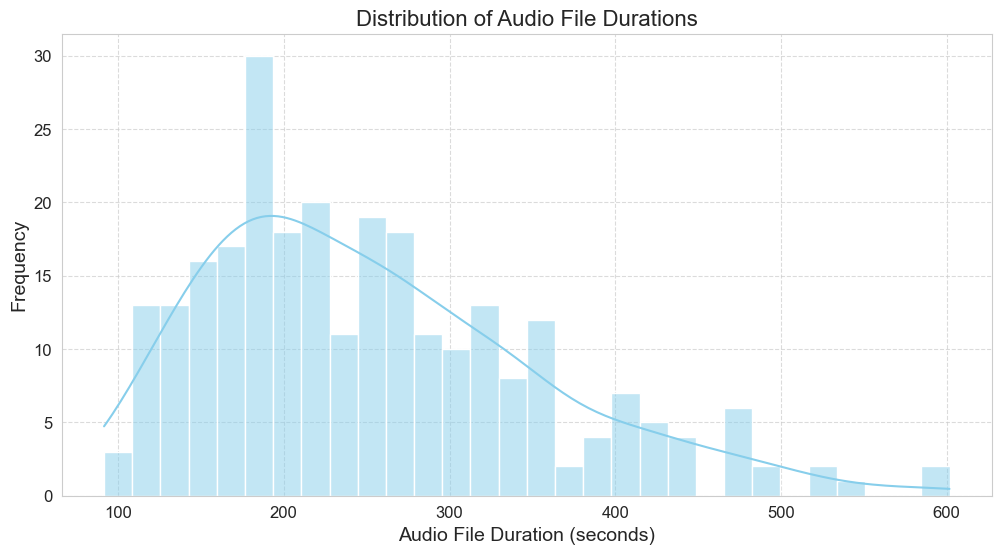

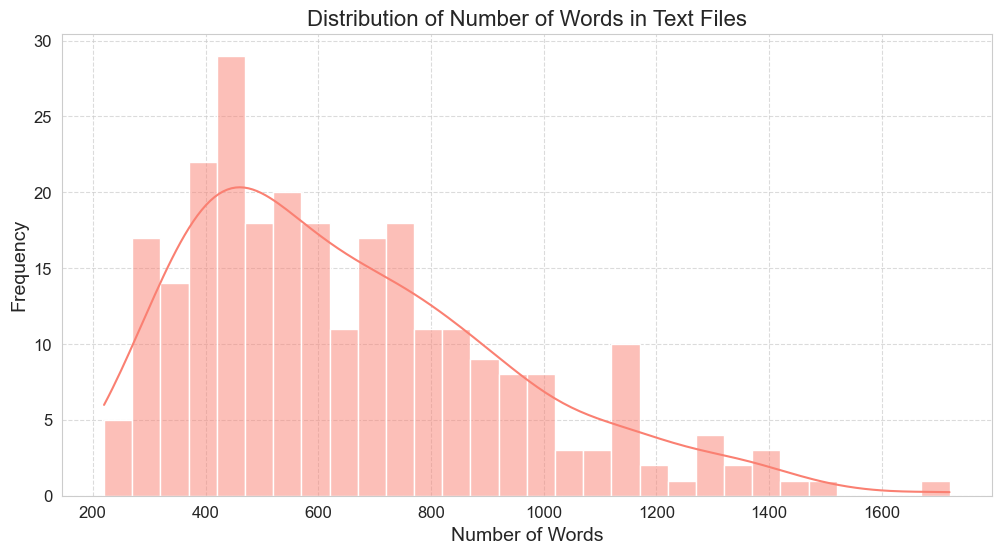

In [99]:
# Calculate the Number of Words column
df['Number of Words'] = df['Average Text Length'] * df['Number of Sentences']

# Set the overall style of the plots
sns.set_style("whitegrid")

# Plot histogram of audio file durations
plt.figure(figsize=(12, 6))
sns.histplot(df['Audio File Duration'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Audio File Durations', fontsize=16)
plt.xlabel('Audio File Duration (seconds)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Plot histogram of the number of words in text files
plt.figure(figsize=(12, 6))
sns.histplot(df['Number of Words'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Number of Words in Text Files', fontsize=16)
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


*Distribution of Audio File Durations*-

Peak: Most audio files are 150-250 seconds, peaking around 180 seconds.
Tail: Fewer files exceed 300 seconds, with a long tail up to 600 seconds.
Distribution of Number of Words in Text Files
Peak: Most text files have 300-600 words, peaking around 400 words.
Tail: Fewer files exceed 800 words, with a long tail up to 1700 words.

*Correlation Between Audio Durations and Number of Words*-

Both histograms show a peak and a gradual decline, suggesting a proportional relationship between audio duration and the number of words.
Generally, longer audio files are associated with more words in the text files, and shorter audio files correspond to fewer words.

**Conclusion**

The peaks in both histograms indicate the most common ranges for audio durations (150-250 seconds) and word counts (300-600 words). This can help focus training efforts on these typical cases to optimize model performance for the most frequent data types

The relation between 'Average Frequency' and 'Silence Proportion' in audio files can provide valuable insights for TTS and STT applications. 
If a strong correlation exists, it might indicate a relationship between speaking style and pauses. For instance, a particular speaker might consistently speak at a higher pitch with more frequent pauses. This can help in training more personalized TTS models and to check if the dataset is enough to train generalized STT models which can adapt different speaking styles
High silence proportions might indicate issues with recording or the presence of non-speech elements. Ensuring high-quality training data with appropriate silence handling can improve TTS and STT performance.

The box plot is explicitely chosen for this purpose to understand the direct connection of Avg frequency distribution with silence proposition in various lavels.

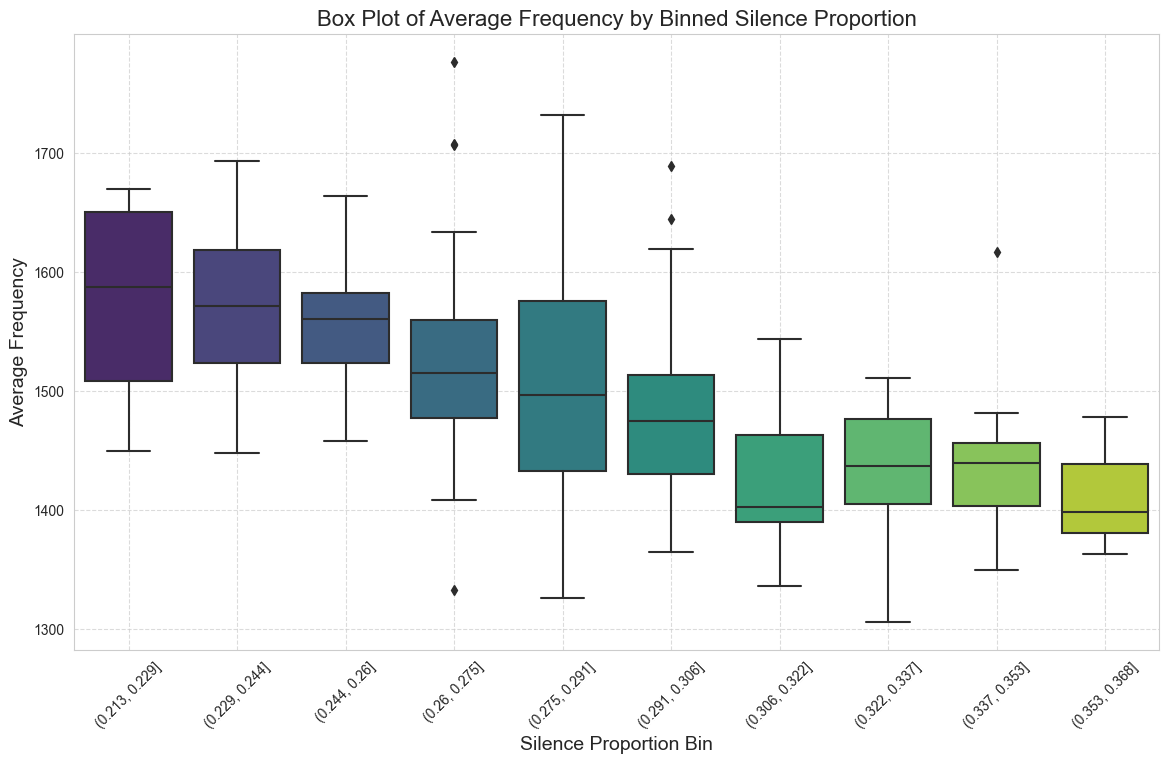

In [107]:
# Visualization of Silence proposition and Frequency distribution across files 
df['Silence Proportion Bin'] = pd.cut(df['Silence Proportion'], bins=10)

# Box plot of Average Frequency grouped by binned Silence Proportion
plt.figure(figsize=(14, 8))
sns.boxplot(x='Silence Proportion Bin', y='Average Frequency', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Box Plot of Average Frequency by Binned Silence Proportion', fontsize=16)
plt.xlabel('Silence Proportion Bin', fontsize=14)
plt.ylabel('Average Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**Observations and inferences from the box plot:**

A few bins show outliers (points outside the whiskers), indicating some values that are significantly higher or lower than the rest of the data in that bin. Outliers are present in bins like (0.26, 0.275], (0.275, 0.291], and (0.322, 0.337]
The range of average frequencies (the distance between the minimum and maximum values) tends to decrease as the silence proportion increase which indicates that as there is more silence in the audio files, the variability in average frequency reduces.
The median shows a downward trend as the silence proportion increases.
Higher silence proportions tend to be associated with lower average frequencies.

**Scatterplot to visualize connection between Average frequency and Noise to signal ratio**


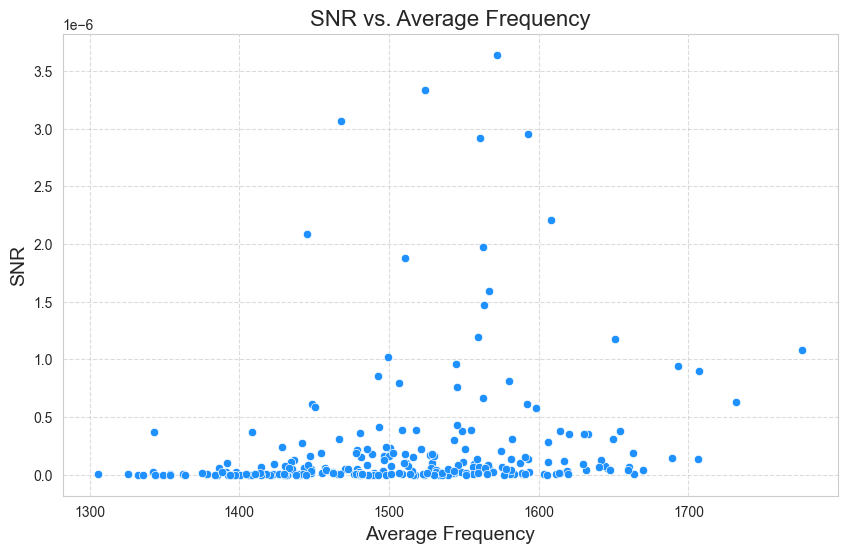

In [110]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Frequency', y='SNR', data=df, color='dodgerblue')
plt.title('SNR vs. Average Frequency', fontsize=16)
plt.xlabel('Average Frequency', fontsize=14)
plt.ylabel('SNR', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Most of the data points are concentrated at the bottom of the plot indicating the Majority of SNR values are relatively lo which is a good sign of the data. A few of the outliers can be removed or denoised from the dataset which will make it more robust for training.
There doesn't apper any correlation of SNR with frequency but the spread of SNR values suggests that higher average frequencies do not consistently result in higher or lower SNR values.


In [111]:
# Calculate the average of all numerical columns
average_values = df.mean()

# Create a report based on the averages
report = f"""
KPI Analysis Report
===================

1. Average Audio File Duration: {average_values['Audio File Duration']:.2f} seconds
2. Average SNR: {average_values['SNR']:.2e}
3. Average Silence Proportion: {average_values['Silence Proportion']:.2f}
4. Average Frequency: {average_values['Average Frequency']:.2f} Hz
5. Average Text Length: {average_values['Average Text Length']:.2f} characters
6. Average Number of Sentences: {average_values['Number of Sentences']:.2f}
7. Average Number of Words: {average_values['Number of Words']:.2f}
"""

# Print the report
print(report)



KPI Analysis Report

1. Average Audio File Duration: 253.71 seconds
2. Average SNR: 2.19e-07
3. Average Silence Proportion: 0.28
4. Average Frequency: 1504.59 Hz
5. Average Text Length: 21.98 characters
6. Average Number of Sentences: 31.17
7. Average Number of Words: 657.98



C:\Users\TANAY\AppData\Local\Temp\ipykernel_7252\3339847094.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  average_values = df.mean()


In [112]:
# Export the DataFrame to a CSV file
df.to_csv('BIbledataframe.csv', index=False)
